Assignment #1: Fully connected Neural network trained on Fashion MINST

In [1]:
# Data acquistion and processing libraries
import matplotlib.pyplot as plt
import numpy as np # Performing linear algebra ops.
import pandas as pd # CSV and data processing
from sklearn.model_selection import train_test_split

# Ai libraries
import tensorflow as tf
from tensorflow import keras

# Keras Callbacks for checkpoints
from keras.callbacks import ModelCheckpoint

# for use on macbook pro CPU
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# create chrome profile
from tensorflow.python.client import timeline

Using TensorFlow backend.


In [2]:
train_d = np.array(pd.read_csv(r'/Users/williamcampbell/Desktop/Final_year/s_01/MCEN90048_Ai_for_MechX/A1/data/fashion-mnist_test.csv'), dtype = 'float32')
test_d = np.array(pd.read_csv(r'/Users/williamcampbell/Desktop/Final_year/s_01/MCEN90048_Ai_for_MechX/A1/data/fashion-mnist_train.csv'), dtype = 'float32')
#testing data size
test_d.shape

(60000, 785)

In [3]:
# Parse training and testing data into images and labels arrays
# Specifics: Input data: [row, columns] -> each row is an image, each column a pixel (28*28 pixels)
# Normalize image values -> pixel data goes from 0->255 : /255 to normalize all values to between 0 and 1
# MAKE IN A FUNCTION -> NORMALIZE
train_images = train_d[:,1:]/255
train_labels = train_d[:,0]

test_images = test_d[:,1:]/255
test_labels = test_d[:,0]

In [4]:
# Divide training data into validation and train arrays for testing in the future
train_images, validate_images, train_labels, validate_labels = train_test_split(train_images, train_labels, test_size =0.2, random_state=12345,)

In [5]:
 In [6]:
# Map label values to their database representation classes.

item_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

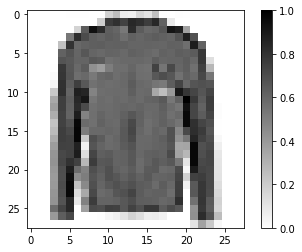

In [6]:
# Display some data to show it has been loaded
# Take one image from training_images, a 784 1d array of pixels
# Reshape the 784 pixels to a (28,28) matrix array and pyplots imshow to plot
sample_image = train_images[100, :].reshape((28, 28))
plt.figure()
plt.imshow(sample_image, cmap= plt.cm.binary)
plt.colorbar()
plt.grid(False)
# plt.xlabel(item_name[train_labels[100,0]])
plt.show()

In [7]:
#Set up model variables
image_r = 28
image_c = 28
im_shape = (image_r, image_c, 1)
BATCH_SIZE = 32
EPOCHS = 10

#Prep data files for fitting
train_images = train_images.reshape(train_images.shape[0],image_r, image_c,1) 
validate_images = validate_images.reshape(validate_images.shape[0] ,image_r, image_c,1) 
test_images = test_images.reshape(test_images.shape[0], image_r, image_c,1)

In [8]:
# Layer setup
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), padding = 'same', activation = tf.nn.relu, input_shape = im_shape),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    #Droup (0.2), #MAYBE -> helpful?
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [9]:
# Tensor board callback
logdir = r'logs\{}'.format('cnn_1layer') #create folder called logs
tbCallBack = tf.keras.callbacks.TensorBoard(
    log_dir = logdir,
    write_graph = True,
    write_grads = True,
    batch_size = BATCH_SIZE,
    histogram_freq = 1,
    write_images = True,
)
callbacks_list = [tbCallBack]

In [10]:
# Set up options for keras profiling
run_options = tf.RunOptions(trace_level=tf.RunOptions.FULL_TRACE)
run_metadata = tf.RunMetadata()

In [11]:
cnn_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'], options=run_options, run_metadata = run_metadata) 

In [12]:
# checkpoint
filepath= '/Users/williamcampbell/Desktop/Final_year/s_01/MCEN90048_Ai_for_MechX/checkpoints/weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list.append(checkpoint) 

In [13]:
cnn_model.fit(train_images, train_labels, batch_size = BATCH_SIZE, epochs = EPOCHS, 
             verbose = 1,
             validation_data = (validate_images, validate_labels), callbacks =callbacks_list
             )

Train on 8000 samples, validate on 2000 samples


Epoch 1/10


  32/8000 [..............................] - ETA: 2:55 - loss: 2.2972 - acc: 0.1250

  96/8000 [..............................] - ETA: 1:05 - loss: 2.2372 - acc: 0.1562

 160/8000 [..............................] - ETA: 42s - loss: 2.1656 - acc: 0.2313 

 224/8000 [..............................] - ETA: 33s - loss: 2.0902 - acc: 0.2679

 288/8000 [>.............................] - ETA: 27s - loss: 1.9826 - acc: 0.3264

 352/8000 [>.............................] - ETA: 24s - loss: 1.8846 - acc: 0.3523

 384/8000 [>.............................] - ETA: 23s - loss: 1.8475 - acc: 0.3620

 448/8000 [>.............................] - ETA: 21s - loss: 1.7444 - acc: 0.3906

 512/8000 [>.............................] - ETA: 19s - loss: 1.6790 - acc: 0.4082

 576/8000 [=>............................] - ETA: 18s - loss: 1.6013 - acc: 0.4323

 640/8000 [=>............................] - ETA: 17s - loss: 1.5509 - acc: 0.4469

 704/8000 [=>............................] - ETA: 16s - loss: 1.5100 - acc: 0.4560

 768/8000 [=>............................] - ETA: 15s - loss: 1.4728 - acc: 0.4688

 832/8000 [==>...........................] - ETA: 14s - loss: 1.4467 - acc: 0.4675

 896/8000 [==>...........................] - ETA: 14s - loss: 1.4204 - acc: 0.4721

 960/8000 [==>...........................] - ETA: 13s - loss: 1.3900 - acc: 0.4875

1024/8000 [==>...........................] - ETA: 13s - loss: 1.3646 - acc: 0.4932

1088/8000 [===>..........................] - ETA: 13s - loss: 1.3526 - acc: 0.4982

1152/8000 [===>..........................] - ETA: 12s - loss: 1.3306 - acc: 0.5069

1216/8000 [===>..........................] - ETA: 12s - loss: 1.3123 - acc: 0.5107

1280/8000 [===>..........................] - ETA: 12s - loss: 1.2831 - acc: 0.5195

1344/8000 [====>.........................] - ETA: 11s - loss: 1.2765 - acc: 0.5201

1408/8000 [====>.........................] - ETA: 11s - loss: 1.2600 - acc: 0.5263

1472/8000 [====>.........................] - ETA: 11s - loss: 1.2483 - acc: 0.5340

1536/8000 [====>.........................] - ETA: 10s - loss: 1.2353 - acc: 0.5404

1600/8000 [=====>........................] - ETA: 10s - loss: 1.2234 - acc: 0.5437

1664/8000 [=====>........................] - ETA: 10s - loss: 1.2008 - acc: 0.5517

1728/8000 [=====>........................] - ETA: 10s - loss: 1.1852 - acc: 0.5567

1792/8000 [=====>........................] - ETA: 10s - loss: 1.1725 - acc: 0.5625

1856/8000 [=====>........................] - ETA: 9s - loss: 1.1543 - acc: 0.5695 

1920/8000 [======>.......................] - ETA: 9s - loss: 1.1363 - acc: 0.5766

1984/8000 [======>.......................] - ETA: 9s - loss: 1.1270 - acc: 0.5801

2048/8000 [======>.......................] - ETA: 9s - loss: 1.1132 - acc: 0.5859

2112/8000 [======>.......................] - ETA: 9s - loss: 1.1052 - acc: 0.5890

2176/8000 [=======>......................] - ETA: 9s - loss: 1.0948 - acc: 0.5924

2240/8000 [=======>......................] - ETA: 8s - loss: 1.0832 - acc: 0.5969

2304/8000 [=======>......................] - ETA: 8s - loss: 1.0762 - acc: 0.5990

2368/8000 [=======>......................] - ETA: 8s - loss: 1.0656 - acc: 0.6030

2432/8000 [========>.....................] - ETA: 8s - loss: 1.0589 - acc: 0.6065

2496/8000 [========>.....................] - ETA: 8s - loss: 1.0498 - acc: 0.6102

2560/8000 [========>.....................] - ETA: 8s - loss: 1.0380 - acc: 0.6141

2624/8000 [========>.....................] - ETA: 8s - loss: 1.0265 - acc: 0.6197

2688/8000 [=========>....................] - ETA: 7s - loss: 1.0206 - acc: 0.6228

2752/8000 [=========>....................] - ETA: 7s - loss: 1.0099 - acc: 0.6272

2816/8000 [=========>....................] - ETA: 7s - loss: 1.0005 - acc: 0.6307

2880/8000 [=========>....................] - ETA: 7s - loss: 0.9905 - acc: 0.6347

2944/8000 [==========>...................] - ETA: 7s - loss: 0.9843 - acc: 0.6369

3008/8000 [==========>...................] - ETA: 7s - loss: 0.9801 - acc: 0.6386

3072/8000 [==========>...................] - ETA: 7s - loss: 0.9704 - acc: 0.6429

3136/8000 [==========>...................] - ETA: 7s - loss: 0.9642 - acc: 0.6448

3168/8000 [==========>...................] - ETA: 7s - loss: 0.9616 - acc: 0.6455

3232/8000 [===========>..................] - ETA: 6s - loss: 0.9561 - acc: 0.6488

3296/8000 [===========>..................] - ETA: 6s - loss: 0.9454 - acc: 0.6520

3360/8000 [===========>..................] - ETA: 6s - loss: 0.9386 - acc: 0.6548

3424/8000 [===========>..................] - ETA: 6s - loss: 0.9297 - acc: 0.6583

3488/8000 [============>.................] - ETA: 6s - loss: 0.9209 - acc: 0.6620

3552/8000 [============>.................] - ETA: 6s - loss: 0.9174 - acc: 0.6633

3616/8000 [============>.................] - ETA: 6s - loss: 0.9090 - acc: 0.6668

3680/8000 [============>.................] - ETA: 6s - loss: 0.9041 - acc: 0.6696

3744/8000 [=============>................] - ETA: 6s - loss: 0.8998 - acc: 0.6715

3808/8000 [=============>................] - ETA: 5s - loss: 0.8938 - acc: 0.6738

3872/8000 [=============>................] - ETA: 5s - loss: 0.8870 - acc: 0.6772

3936/8000 [=============>................] - ETA: 5s - loss: 0.8804 - acc: 0.6796

4000/8000 [==============>...............] - ETA: 5s - loss: 0.8760 - acc: 0.6807

4064/8000 [==============>...............] - ETA: 5s - loss: 0.8703 - acc: 0.6831

4128/8000 [==============>...............] - ETA: 5s - loss: 0.8650 - acc: 0.6853

4192/8000 [==============>...............] - ETA: 5s - loss: 0.8595 - acc: 0.6868

4256/8000 [==============>...............] - ETA: 5s - loss: 0.8543 - acc: 0.6887

4320/8000 [===============>..............] - ETA: 5s - loss: 0.8493 - acc: 0.6905

4384/8000 [===============>..............] - ETA: 5s - loss: 0.8449 - acc: 0.6916

4448/8000 [===============>..............] - ETA: 4s - loss: 0.8390 - acc: 0.6938

4512/8000 [===============>..............] - ETA: 4s - loss: 0.8333 - acc: 0.6959

4576/8000 [================>.............] - ETA: 4s - loss: 0.8279 - acc: 0.6971

4640/8000 [================>.............] - ETA: 4s - loss: 0.8234 - acc: 0.6987

4704/8000 [================>.............] - ETA: 4s - loss: 0.8178 - acc: 0.7007

4768/8000 [================>.............] - ETA: 4s - loss: 0.8164 - acc: 0.7009

4832/8000 [=================>............] - ETA: 4s - loss: 0.8124 - acc: 0.7026

4864/8000 [=================>............] - ETA: 4s - loss: 0.8111 - acc: 0.7031

4928/8000 [=================>............] - ETA: 4s - loss: 0.8079 - acc: 0.7037

4992/8000 [=================>............] - ETA: 4s - loss: 0.8053 - acc: 0.7045

5056/8000 [=================>............] - ETA: 4s - loss: 0.8017 - acc: 0.7055

5120/8000 [==================>...........] - ETA: 3s - loss: 0.7995 - acc: 0.7066

5184/8000 [==================>...........] - ETA: 3s - loss: 0.7951 - acc: 0.7081

5248/8000 [==================>...........] - ETA: 3s - loss: 0.7928 - acc: 0.7087

5312/8000 [==================>...........] - ETA: 3s - loss: 0.7901 - acc: 0.7088

5376/8000 [===================>..........] - ETA: 3s - loss: 0.7859 - acc: 0.7104

5440/8000 [===================>..........] - ETA: 3s - loss: 0.7836 - acc: 0.7116

5504/8000 [===================>..........] - ETA: 3s - loss: 0.7813 - acc: 0.7120

5568/8000 [===================>..........] - ETA: 3s - loss: 0.7770 - acc: 0.7137

5632/8000 [====================>.........] - ETA: 3s - loss: 0.7754 - acc: 0.7140

5696/8000 [====================>.........] - ETA: 3s - loss: 0.7730 - acc: 0.7149

5760/8000 [====================>.........] - ETA: 3s - loss: 0.7688 - acc: 0.7165

5824/8000 [====================>.........] - ETA: 2s - loss: 0.7652 - acc: 0.7181

5888/8000 [=====================>........] - ETA: 2s - loss: 0.7647 - acc: 0.7194

5952/8000 [=====================>........] - ETA: 2s - loss: 0.7606 - acc: 0.7209

6016/8000 [=====================>........] - ETA: 2s - loss: 0.7570 - acc: 0.7222

6080/8000 [=====================>........] - ETA: 2s - loss: 0.7536 - acc: 0.7234

6144/8000 [======================>.......] - ETA: 2s - loss: 0.7501 - acc: 0.7248

6208/8000 [======================>.......] - ETA: 2s - loss: 0.7469 - acc: 0.7258

6272/8000 [======================>.......] - ETA: 2s - loss: 0.7438 - acc: 0.7270

6336/8000 [======================>.......] - ETA: 2s - loss: 0.7404 - acc: 0.7282

6400/8000 [=======================>......] - ETA: 2s - loss: 0.7365 - acc: 0.7297

6464/8000 [=======================>......] - ETA: 2s - loss: 0.7335 - acc: 0.7310

6528/8000 [=======================>......] - ETA: 1s - loss: 0.7316 - acc: 0.7321

6592/8000 [=======================>......] - ETA: 1s - loss: 0.7305 - acc: 0.7332

6656/8000 [=======================>......] - ETA: 1s - loss: 0.7274 - acc: 0.7347

6720/8000 [========================>.....] - ETA: 1s - loss: 0.7254 - acc: 0.7353

6784/8000 [========================>.....] - ETA: 1s - loss: 0.7235 - acc: 0.7358

6848/8000 [========================>.....] - ETA: 1s - loss: 0.7213 - acc: 0.7366

6912/8000 [========================>.....] - ETA: 1s - loss: 0.7194 - acc: 0.7381

6976/8000 [=========================>....] - ETA: 1s - loss: 0.7184 - acc: 0.7392

7040/8000 [=========================>....] - ETA: 1s - loss: 0.7162 - acc: 0.7401

7104/8000 [=========================>....] - ETA: 1s - loss: 0.7136 - acc: 0.7410

7168/8000 [=========================>....] - ETA: 1s - loss: 0.7108 - acc: 0.7419

7232/8000 [==========================>...] - ETA: 1s - loss: 0.7111 - acc: 0.7423

7296/8000 [==========================>...] - ETA: 0s - loss: 0.7094 - acc: 0.7436

7360/8000 [==========================>...] - ETA: 0s - loss: 0.7063 - acc: 0.7448

7424/8000 [==========================>...] - ETA: 0s - loss: 0.7028 - acc: 0.7458

7488/8000 [===========================>..] - ETA: 0s - loss: 0.7006 - acc: 0.7469

7552/8000 [===========================>..] - ETA: 0s - loss: 0.6985 - acc: 0.7476

7616/8000 [===========================>..] - ETA: 0s - loss: 0.6962 - acc: 0.7484

7680/8000 [===========================>..] - ETA: 0s - loss: 0.6954 - acc: 0.7484

7744/8000 [============================>.] - ETA: 0s - loss: 0.6947 - acc: 0.7488

7808/8000 [============================>.] - ETA: 0s - loss: 0.6934 - acc: 0.7495

7872/8000 [============================>.] - ETA: 0s - loss: 0.6910 - acc: 0.7501

7936/8000 [============================>.] - ETA: 0s - loss: 0.6891 - acc: 0.7510


Epoch 00001: val_acc improved from -inf to 0.85000, saving model to /Users/williamcampbell/Desktop/Final_year/s_01/MCEN90048_Ai_for_MechX/checkpoints/weights-improvement-01-0.85.hdf5


8000/8000 [==============================] - 21s 3ms/step - loss: 0.6876 - acc: 0.7514 - val_loss: 0.4487 - val_acc: 0.8500


Epoch 2/10
  32/8000 [..............................] - ETA: 13s - loss: 0.5170 - acc: 0.8438

  64/8000 [..............................] - ETA: 13s - loss: 0.3766 - acc: 0.8906

 128/8000 [..............................] - ETA: 11s - loss: 0.3907 - acc: 0.8828

 192/8000 [..............................] - ETA: 11s - loss: 0.5120 - acc: 0.8490

 256/8000 [..............................] - ETA: 10s - loss: 0.4984 - acc: 0.8398

 320/8000 [>.............................] - ETA: 10s - loss: 0.4833 - acc: 0.8469

 384/8000 [>.............................] - ETA: 10s - loss: 0.4887 - acc: 0.8281

 448/8000 [>.............................] - ETA: 10s - loss: 0.4738 - acc: 0.8348

 512/8000 [>.............................] - ETA: 9s - loss: 0.4800 - acc: 0.8359 

 576/8000 [=>............................] - ETA: 9s - loss: 0.4730 - acc: 0.8368

 640/8000 [=>............................] - ETA: 9s - loss: 0.4668 - acc: 0.8422

 704/8000 [=>............................] - ETA: 9s - loss: 0.4749 - acc: 0.8366

 768/8000 [=>............................] - ETA: 9s - loss: 0.4761 - acc: 0.8346

 832/8000 [==>...........................] - ETA: 9s - loss: 0.4788 - acc: 0.8329

 896/8000 [==>...........................] - ETA: 9s - loss: 0.4801 - acc: 0.8326

 960/8000 [==>...........................] - ETA: 9s - loss: 0.4744 - acc: 0.8354

1024/8000 [==>...........................] - ETA: 8s - loss: 0.4802 - acc: 0.8359

1088/8000 [===>..........................] - ETA: 8s - loss: 0.4717 - acc: 0.8382

1152/8000 [===>..........................] - ETA: 8s - loss: 0.4835 - acc: 0.8342

1216/8000 [===>..........................] - ETA: 8s - loss: 0.4874 - acc: 0.8339

1280/8000 [===>..........................] - ETA: 8s - loss: 0.4856 - acc: 0.8336

1344/8000 [====>.........................] - ETA: 8s - loss: 0.4816 - acc: 0.8356

1408/8000 [====>.........................] - ETA: 8s - loss: 0.4978 - acc: 0.8295

1472/8000 [====>.........................] - ETA: 8s - loss: 0.4950 - acc: 0.8315

1536/8000 [====>.........................] - ETA: 8s - loss: 0.4927 - acc: 0.8314

1600/8000 [=====>........................] - ETA: 8s - loss: 0.4928 - acc: 0.8325

1664/8000 [=====>........................] - ETA: 8s - loss: 0.4842 - acc: 0.8341

1696/8000 [=====>........................] - ETA: 8s - loss: 0.4798 - acc: 0.8355

1728/8000 [=====>........................] - ETA: 8s - loss: 0.4771 - acc: 0.8356

1792/8000 [=====>........................] - ETA: 7s - loss: 0.4729 - acc: 0.8376

1856/8000 [=====>........................] - ETA: 7s - loss: 0.4717 - acc: 0.8362

1920/8000 [======>.......................] - ETA: 7s - loss: 0.4728 - acc: 0.8354

1984/8000 [======>.......................] - ETA: 7s - loss: 0.4721 - acc: 0.8357

2048/8000 [======>.......................] - ETA: 7s - loss: 0.4721 - acc: 0.8354

2112/8000 [======>.......................] - ETA: 7s - loss: 0.4715 - acc: 0.8348

2176/8000 [=======>......................] - ETA: 7s - loss: 0.4715 - acc: 0.8346

2240/8000 [=======>......................] - ETA: 7s - loss: 0.4685 - acc: 0.8344

2304/8000 [=======>......................] - ETA: 7s - loss: 0.4667 - acc: 0.8346

2368/8000 [=======>......................] - ETA: 7s - loss: 0.4697 - acc: 0.8323

2432/8000 [========>.....................] - ETA: 7s - loss: 0.4676 - acc: 0.8335

2496/8000 [========>.....................] - ETA: 7s - loss: 0.4643 - acc: 0.8341

2560/8000 [========>.....................] - ETA: 6s - loss: 0.4657 - acc: 0.8336

2624/8000 [========>.....................] - ETA: 6s - loss: 0.4644 - acc: 0.8342

2688/8000 [=========>....................] - ETA: 6s - loss: 0.4646 - acc: 0.8333

2752/8000 [=========>....................] - ETA: 6s - loss: 0.4653 - acc: 0.8332

2816/8000 [=========>....................] - ETA: 6s - loss: 0.4616 - acc: 0.8338

2880/8000 [=========>....................] - ETA: 6s - loss: 0.4571 - acc: 0.8351

2944/8000 [==========>...................] - ETA: 6s - loss: 0.4526 - acc: 0.8356

3008/8000 [==========>...................] - ETA: 6s - loss: 0.4487 - acc: 0.8378

3072/8000 [==========>...................] - ETA: 6s - loss: 0.4482 - acc: 0.8376

3136/8000 [==========>...................] - ETA: 6s - loss: 0.4529 - acc: 0.8367

3200/8000 [===========>..................] - ETA: 6s - loss: 0.4519 - acc: 0.8372

3264/8000 [===========>..................] - ETA: 5s - loss: 0.4511 - acc: 0.8373

3328/8000 [===========>..................] - ETA: 5s - loss: 0.4503 - acc: 0.8377

3392/8000 [===========>..................] - ETA: 5s - loss: 0.4469 - acc: 0.8393

3456/8000 [===========>..................] - ETA: 5s - loss: 0.4458 - acc: 0.8400

3520/8000 [============>.................] - ETA: 5s - loss: 0.4432 - acc: 0.8409

3584/8000 [============>.................] - ETA: 5s - loss: 0.4417 - acc: 0.8415

3648/8000 [============>.................] - ETA: 5s - loss: 0.4404 - acc: 0.8418

3712/8000 [============>.................] - ETA: 5s - loss: 0.4392 - acc: 0.8421

3776/8000 [=============>................] - ETA: 5s - loss: 0.4366 - acc: 0.8438

3840/8000 [=============>................] - ETA: 5s - loss: 0.4366 - acc: 0.8443

3904/8000 [=============>................] - ETA: 5s - loss: 0.4348 - acc: 0.8448

3968/8000 [=============>................] - ETA: 5s - loss: 0.4333 - acc: 0.8450

4032/8000 [==============>...............] - ETA: 5s - loss: 0.4309 - acc: 0.8457

4096/8000 [==============>...............] - ETA: 4s - loss: 0.4297 - acc: 0.8455

4160/8000 [==============>...............] - ETA: 4s - loss: 0.4288 - acc: 0.8462

4224/8000 [==============>...............] - ETA: 4s - loss: 0.4323 - acc: 0.8449

4288/8000 [===============>..............] - ETA: 4s - loss: 0.4316 - acc: 0.8444

4352/8000 [===============>..............] - ETA: 4s - loss: 0.4330 - acc: 0.8442

4416/8000 [===============>..............] - ETA: 4s - loss: 0.4305 - acc: 0.8453

4480/8000 [===============>..............] - ETA: 4s - loss: 0.4293 - acc: 0.8460

4544/8000 [================>.............] - ETA: 4s - loss: 0.4268 - acc: 0.8462

4608/8000 [================>.............] - ETA: 4s - loss: 0.4289 - acc: 0.8448

4672/8000 [================>.............] - ETA: 4s - loss: 0.4267 - acc: 0.8461

4736/8000 [================>.............] - ETA: 4s - loss: 0.4257 - acc: 0.8467

4800/8000 [=================>............] - ETA: 4s - loss: 0.4242 - acc: 0.8467

4864/8000 [=================>............] - ETA: 3s - loss: 0.4232 - acc: 0.8477

4928/8000 [=================>............] - ETA: 3s - loss: 0.4223 - acc: 0.8484

4992/8000 [=================>............] - ETA: 3s - loss: 0.4224 - acc: 0.8484

5056/8000 [=================>............] - ETA: 3s - loss: 0.4226 - acc: 0.8483

5120/8000 [==================>...........] - ETA: 3s - loss: 0.4209 - acc: 0.8484

5184/8000 [==================>...........] - ETA: 3s - loss: 0.4199 - acc: 0.8484

5248/8000 [==================>...........] - ETA: 3s - loss: 0.4191 - acc: 0.8489

5312/8000 [==================>...........] - ETA: 3s - loss: 0.4187 - acc: 0.8490

5376/8000 [===================>..........] - ETA: 3s - loss: 0.4171 - acc: 0.8491

5440/8000 [===================>..........] - ETA: 3s - loss: 0.4179 - acc: 0.8489

5504/8000 [===================>..........] - ETA: 3s - loss: 0.4210 - acc: 0.8485

5568/8000 [===================>..........] - ETA: 3s - loss: 0.4217 - acc: 0.8481

5632/8000 [====================>.........] - ETA: 2s - loss: 0.4215 - acc: 0.8489

5696/8000 [====================>.........] - ETA: 2s - loss: 0.4210 - acc: 0.8492

5760/8000 [====================>.........] - ETA: 2s - loss: 0.4213 - acc: 0.8491

5824/8000 [====================>.........] - ETA: 2s - loss: 0.4219 - acc: 0.8489

5888/8000 [=====================>........] - ETA: 2s - loss: 0.4226 - acc: 0.8483

5952/8000 [=====================>........] - ETA: 2s - loss: 0.4229 - acc: 0.8486

6016/8000 [=====================>........] - ETA: 2s - loss: 0.4218 - acc: 0.8491

6080/8000 [=====================>........] - ETA: 2s - loss: 0.4208 - acc: 0.8497

6144/8000 [======================>.......] - ETA: 2s - loss: 0.4216 - acc: 0.8496

6208/8000 [======================>.......] - ETA: 2s - loss: 0.4220 - acc: 0.8491

6272/8000 [======================>.......] - ETA: 2s - loss: 0.4201 - acc: 0.8498

6336/8000 [======================>.......] - ETA: 2s - loss: 0.4200 - acc: 0.8501

6400/8000 [=======================>......] - ETA: 2s - loss: 0.4182 - acc: 0.8505

6464/8000 [=======================>......] - ETA: 1s - loss: 0.4176 - acc: 0.8501

6528/8000 [=======================>......] - ETA: 1s - loss: 0.4184 - acc: 0.8499

6592/8000 [=======================>......] - ETA: 1s - loss: 0.4182 - acc: 0.8498

6656/8000 [=======================>......] - ETA: 1s - loss: 0.4170 - acc: 0.8501

6720/8000 [========================>.....] - ETA: 1s - loss: 0.4178 - acc: 0.8490

6784/8000 [========================>.....] - ETA: 1s - loss: 0.4206 - acc: 0.8479

6848/8000 [========================>.....] - ETA: 1s - loss: 0.4206 - acc: 0.8477

6912/8000 [========================>.....] - ETA: 1s - loss: 0.4206 - acc: 0.8477

6976/8000 [=========================>....] - ETA: 1s - loss: 0.4197 - acc: 0.8476

7040/8000 [=========================>....] - ETA: 1s - loss: 0.4200 - acc: 0.8473

7104/8000 [=========================>....] - ETA: 1s - loss: 0.4198 - acc: 0.8474

7168/8000 [=========================>....] - ETA: 1s - loss: 0.4195 - acc: 0.8474

7232/8000 [==========================>...] - ETA: 0s - loss: 0.4187 - acc: 0.8476

7296/8000 [==========================>...] - ETA: 0s - loss: 0.4172 - acc: 0.8481

7360/8000 [==========================>...] - ETA: 0s - loss: 0.4171 - acc: 0.8480

7424/8000 [==========================>...] - ETA: 0s - loss: 0.4159 - acc: 0.8483

7488/8000 [===========================>..] - ETA: 0s - loss: 0.4157 - acc: 0.8487

7552/8000 [===========================>..] - ETA: 0s - loss: 0.4148 - acc: 0.8489

7616/8000 [===========================>..] - ETA: 0s - loss: 0.4159 - acc: 0.8485

7648/8000 [===========================>..] - ETA: 0s - loss: 0.4148 - acc: 0.8490

7680/8000 [===========================>..] - ETA: 0s - loss: 0.4141 - acc: 0.8490

7744/8000 [============================>.] - ETA: 0s - loss: 0.4148 - acc: 0.8489

7808/8000 [============================>.] - ETA: 0s - loss: 0.4133 - acc: 0.8496

7872/8000 [============================>.] - ETA: 0s - loss: 0.4125 - acc: 0.8497

7936/8000 [============================>.] - ETA: 0s - loss: 0.4129 - acc: 0.8494


Epoch 00002: val_acc improved from 0.85000 to 0.85850, saving model to /Users/williamcampbell/Desktop/Final_year/s_01/MCEN90048_Ai_for_MechX/checkpoints/weights-improvement-02-0.86.hdf5
8000/8000 [==============================] - 20s 3ms/step - loss: 0.4126 - acc: 0.8493 - val_loss: 0.3851 - val_acc: 0.8585


Epoch 3/10
  32/8000 [..............................] - ETA: 14s - loss: 0.4225 - acc: 0.9062

  64/8000 [..............................] - ETA: 14s - loss: 0.3995 - acc: 0.8594

 128/8000 [..............................] - ETA: 12s - loss: 0.3651 - acc: 0.8750

 192/8000 [..............................] - ETA: 11s - loss: 0.3282 - acc: 0.8906

 256/8000 [..............................] - ETA: 10s - loss: 0.3150 - acc: 0.8867

 320/8000 [>.............................] - ETA: 10s - loss: 0.3238 - acc: 0.8781

 384/8000 [>.............................] - ETA: 10s - loss: 0.3123 - acc: 0.8802

 448/8000 [>.............................] - ETA: 10s - loss: 0.3161 - acc: 0.8839

 512/8000 [>.............................] - ETA: 9s - loss: 0.3131 - acc: 0.8809 

 576/8000 [=>............................] - ETA: 9s - loss: 0.3080 - acc: 0.8802

 640/8000 [=>............................] - ETA: 9s - loss: 0.3129 - acc: 0.8797

 704/8000 [=>............................] - ETA: 9s - loss: 0.3058 - acc: 0.8821

 768/8000 [=>............................] - ETA: 9s - loss: 0.2986 - acc: 0.8841

 832/8000 [==>...........................] - ETA: 9s - loss: 0.2946 - acc: 0.8882

 896/8000 [==>...........................] - ETA: 9s - loss: 0.2878 - acc: 0.8895

 960/8000 [==>...........................] - ETA: 9s - loss: 0.2928 - acc: 0.8885

1024/8000 [==>...........................] - ETA: 9s - loss: 0.2968 - acc: 0.8848

1088/8000 [===>..........................] - ETA: 8s - loss: 0.3030 - acc: 0.8824

1152/8000 [===>..........................] - ETA: 8s - loss: 0.2980 - acc: 0.8845

1216/8000 [===>..........................] - ETA: 8s - loss: 0.3083 - acc: 0.8824

1280/8000 [===>..........................] - ETA: 8s - loss: 0.3183 - acc: 0.8797

1344/8000 [====>.........................] - ETA: 8s - loss: 0.3252 - acc: 0.8787

1408/8000 [====>.........................] - ETA: 8s - loss: 0.3261 - acc: 0.8807

1472/8000 [====>.........................] - ETA: 8s - loss: 0.3316 - acc: 0.8784

1536/8000 [====>.........................] - ETA: 8s - loss: 0.3375 - acc: 0.8757

1600/8000 [=====>........................] - ETA: 8s - loss: 0.3492 - acc: 0.8731

1664/8000 [=====>........................] - ETA: 8s - loss: 0.3533 - acc: 0.8702

1728/8000 [=====>........................] - ETA: 8s - loss: 0.3577 - acc: 0.8686

1792/8000 [=====>........................] - ETA: 7s - loss: 0.3592 - acc: 0.8689

1856/8000 [=====>........................] - ETA: 7s - loss: 0.3574 - acc: 0.8707

1920/8000 [======>.......................] - ETA: 7s - loss: 0.3569 - acc: 0.8703

1984/8000 [======>.......................] - ETA: 7s - loss: 0.3576 - acc: 0.8700

2048/8000 [======>.......................] - ETA: 7s - loss: 0.3546 - acc: 0.8701

2112/8000 [======>.......................] - ETA: 7s - loss: 0.3539 - acc: 0.8712

2176/8000 [=======>......................] - ETA: 7s - loss: 0.3497 - acc: 0.8727

2240/8000 [=======>......................] - ETA: 7s - loss: 0.3527 - acc: 0.8705

2304/8000 [=======>......................] - ETA: 7s - loss: 0.3507 - acc: 0.8702

2368/8000 [=======>......................] - ETA: 7s - loss: 0.3531 - acc: 0.8695

2432/8000 [========>.....................] - ETA: 7s - loss: 0.3482 - acc: 0.8721

2496/8000 [========>.....................] - ETA: 7s - loss: 0.3503 - acc: 0.8710

2560/8000 [========>.....................] - ETA: 6s - loss: 0.3524 - acc: 0.8699

2624/8000 [========>.....................] - ETA: 6s - loss: 0.3530 - acc: 0.8708

2688/8000 [=========>....................] - ETA: 6s - loss: 0.3525 - acc: 0.8713

2752/8000 [=========>....................] - ETA: 6s - loss: 0.3521 - acc: 0.8721

2816/8000 [=========>....................] - ETA: 6s - loss: 0.3512 - acc: 0.8722

2880/8000 [=========>....................] - ETA: 6s - loss: 0.3519 - acc: 0.8715

2944/8000 [==========>...................] - ETA: 6s - loss: 0.3498 - acc: 0.8716

3008/8000 [==========>...................] - ETA: 6s - loss: 0.3504 - acc: 0.8720

3072/8000 [==========>...................] - ETA: 6s - loss: 0.3498 - acc: 0.8730

3136/8000 [==========>...................] - ETA: 6s - loss: 0.3503 - acc: 0.8728

3200/8000 [===========>..................] - ETA: 6s - loss: 0.3466 - acc: 0.8741

3264/8000 [===========>..................] - ETA: 6s - loss: 0.3514 - acc: 0.8725

3328/8000 [===========>..................] - ETA: 5s - loss: 0.3547 - acc: 0.8714

3392/8000 [===========>..................] - ETA: 5s - loss: 0.3603 - acc: 0.8688

3456/8000 [===========>..................] - ETA: 5s - loss: 0.3603 - acc: 0.8686

3520/8000 [============>.................] - ETA: 5s - loss: 0.3596 - acc: 0.8682

3584/8000 [============>.................] - ETA: 5s - loss: 0.3566 - acc: 0.8691

3648/8000 [============>.................] - ETA: 5s - loss: 0.3605 - acc: 0.8692

3712/8000 [============>.................] - ETA: 5s - loss: 0.3604 - acc: 0.8699

3776/8000 [=============>................] - ETA: 5s - loss: 0.3605 - acc: 0.8702

3840/8000 [=============>................] - ETA: 5s - loss: 0.3603 - acc: 0.8701

3904/8000 [=============>................] - ETA: 5s - loss: 0.3615 - acc: 0.8694

3968/8000 [=============>................] - ETA: 5s - loss: 0.3616 - acc: 0.8692

4032/8000 [==============>...............] - ETA: 5s - loss: 0.3631 - acc: 0.8688

4096/8000 [==============>...............] - ETA: 4s - loss: 0.3614 - acc: 0.8689

4160/8000 [==============>...............] - ETA: 4s - loss: 0.3621 - acc: 0.8688

4224/8000 [==============>...............] - ETA: 4s - loss: 0.3638 - acc: 0.8674

4288/8000 [===============>..............] - ETA: 4s - loss: 0.3621 - acc: 0.8685

4352/8000 [===============>..............] - ETA: 4s - loss: 0.3624 - acc: 0.8683

4416/8000 [===============>..............] - ETA: 4s - loss: 0.3636 - acc: 0.8678

4480/8000 [===============>..............] - ETA: 4s - loss: 0.3627 - acc: 0.8681

4544/8000 [================>.............] - ETA: 4s - loss: 0.3611 - acc: 0.8684

4608/8000 [================>.............] - ETA: 4s - loss: 0.3596 - acc: 0.8691

4672/8000 [================>.............] - ETA: 4s - loss: 0.3582 - acc: 0.8699

4736/8000 [================>.............] - ETA: 4s - loss: 0.3574 - acc: 0.8699

4800/8000 [=================>............] - ETA: 4s - loss: 0.3568 - acc: 0.8704

4864/8000 [=================>............] - ETA: 3s - loss: 0.3575 - acc: 0.8699

4928/8000 [=================>............] - ETA: 3s - loss: 0.3569 - acc: 0.8701

4992/8000 [=================>............] - ETA: 3s - loss: 0.3562 - acc: 0.8706

5056/8000 [=================>............] - ETA: 3s - loss: 0.3564 - acc: 0.8706

5120/8000 [==================>...........] - ETA: 3s - loss: 0.3561 - acc: 0.8707

5184/8000 [==================>...........] - ETA: 3s - loss: 0.3575 - acc: 0.8708

5248/8000 [==================>...........] - ETA: 3s - loss: 0.3562 - acc: 0.8714

5312/8000 [==================>...........] - ETA: 3s - loss: 0.3538 - acc: 0.8722

5376/8000 [===================>..........] - ETA: 3s - loss: 0.3545 - acc: 0.8722

5440/8000 [===================>..........] - ETA: 3s - loss: 0.3561 - acc: 0.8719

5504/8000 [===================>..........] - ETA: 3s - loss: 0.3587 - acc: 0.8712

5568/8000 [===================>..........] - ETA: 3s - loss: 0.3566 - acc: 0.8719

5632/8000 [====================>.........] - ETA: 3s - loss: 0.3564 - acc: 0.8718

5696/8000 [====================>.........] - ETA: 2s - loss: 0.3574 - acc: 0.8713

5760/8000 [====================>.........] - ETA: 2s - loss: 0.3569 - acc: 0.8719

5824/8000 [====================>.........] - ETA: 2s - loss: 0.3556 - acc: 0.8723

5888/8000 [=====================>........] - ETA: 2s - loss: 0.3556 - acc: 0.8723

5952/8000 [=====================>........] - ETA: 2s - loss: 0.3553 - acc: 0.8725

6016/8000 [=====================>........] - ETA: 2s - loss: 0.3553 - acc: 0.8720

6080/8000 [=====================>........] - ETA: 2s - loss: 0.3562 - acc: 0.8717

6144/8000 [======================>.......] - ETA: 2s - loss: 0.3555 - acc: 0.8719

6208/8000 [======================>.......] - ETA: 2s - loss: 0.3551 - acc: 0.8721

6272/8000 [======================>.......] - ETA: 2s - loss: 0.3550 - acc: 0.8724

6336/8000 [======================>.......] - ETA: 2s - loss: 0.3541 - acc: 0.8725

6400/8000 [=======================>......] - ETA: 2s - loss: 0.3547 - acc: 0.8722

6464/8000 [=======================>......] - ETA: 1s - loss: 0.3541 - acc: 0.8722

6528/8000 [=======================>......] - ETA: 1s - loss: 0.3536 - acc: 0.8724

6592/8000 [=======================>......] - ETA: 1s - loss: 0.3532 - acc: 0.8721

6656/8000 [=======================>......] - ETA: 1s - loss: 0.3523 - acc: 0.8724

6720/8000 [========================>.....] - ETA: 1s - loss: 0.3528 - acc: 0.8722

6784/8000 [========================>.....] - ETA: 1s - loss: 0.3537 - acc: 0.8713

6848/8000 [========================>.....] - ETA: 1s - loss: 0.3528 - acc: 0.8716

6912/8000 [========================>.....] - ETA: 1s - loss: 0.3513 - acc: 0.8721

6976/8000 [=========================>....] - ETA: 1s - loss: 0.3519 - acc: 0.8718

7040/8000 [=========================>....] - ETA: 1s - loss: 0.3515 - acc: 0.8720

7104/8000 [=========================>....] - ETA: 1s - loss: 0.3513 - acc: 0.8719

7168/8000 [=========================>....] - ETA: 1s - loss: 0.3506 - acc: 0.8721

7232/8000 [==========================>...] - ETA: 0s - loss: 0.3506 - acc: 0.8722

7296/8000 [==========================>...] - ETA: 0s - loss: 0.3494 - acc: 0.8727

7360/8000 [==========================>...] - ETA: 0s - loss: 0.3506 - acc: 0.8724

7424/8000 [==========================>...] - ETA: 0s - loss: 0.3501 - acc: 0.8727

7488/8000 [===========================>..] - ETA: 0s - loss: 0.3499 - acc: 0.8727

7552/8000 [===========================>..] - ETA: 0s - loss: 0.3503 - acc: 0.8729

7616/8000 [===========================>..] - ETA: 0s - loss: 0.3489 - acc: 0.8733

7680/8000 [===========================>..] - ETA: 0s - loss: 0.3491 - acc: 0.8733

7744/8000 [============================>.] - ETA: 0s - loss: 0.3490 - acc: 0.8737

7808/8000 [============================>.] - ETA: 0s - loss: 0.3490 - acc: 0.8736

7872/8000 [============================>.] - ETA: 0s - loss: 0.3498 - acc: 0.8732

7936/8000 [============================>.] - ETA: 0s - loss: 0.3500 - acc: 0.8732


Epoch 00003: val_acc improved from 0.85850 to 0.88200, saving model to /Users/williamcampbell/Desktop/Final_year/s_01/MCEN90048_Ai_for_MechX/checkpoints/weights-improvement-03-0.88.hdf5
8000/8000 [==============================] - 20s 3ms/step - loss: 0.3490 - acc: 0.8738 - val_loss: 0.3475 - val_acc: 0.8820


Epoch 4/10
  32/8000 [..............................] - ETA: 17s - loss: 0.2625 - acc: 0.9375

  64/8000 [..............................] - ETA: 17s - loss: 0.2926 - acc: 0.9219

 128/8000 [..............................] - ETA: 13s - loss: 0.2577 - acc: 0.9219

 192/8000 [..............................] - ETA: 12s - loss: 0.2967 - acc: 0.9062

 256/8000 [..............................] - ETA: 11s - loss: 0.2808 - acc: 0.9102

 320/8000 [>.............................] - ETA: 11s - loss: 0.2852 - acc: 0.9094

 384/8000 [>.............................] - ETA: 10s - loss: 0.2663 - acc: 0.9141

 448/8000 [>.............................] - ETA: 10s - loss: 0.2743 - acc: 0.9062

 512/8000 [>.............................] - ETA: 10s - loss: 0.2674 - acc: 0.9102

 576/8000 [=>............................] - ETA: 10s - loss: 0.2802 - acc: 0.9080

 640/8000 [=>............................] - ETA: 9s - loss: 0.2784 - acc: 0.9094 

 704/8000 [=>............................] - ETA: 9s - loss: 0.2819 - acc: 0.9062

 768/8000 [=>............................] - ETA: 9s - loss: 0.2905 - acc: 0.9023

 832/8000 [==>...........................] - ETA: 9s - loss: 0.2920 - acc: 0.9026

 896/8000 [==>...........................] - ETA: 9s - loss: 0.2917 - acc: 0.9018

 960/8000 [==>...........................] - ETA: 9s - loss: 0.2847 - acc: 0.9052

1024/8000 [==>...........................] - ETA: 9s - loss: 0.2791 - acc: 0.9072

1088/8000 [===>..........................] - ETA: 9s - loss: 0.2836 - acc: 0.9044

1152/8000 [===>..........................] - ETA: 9s - loss: 0.2829 - acc: 0.9028

1216/8000 [===>..........................] - ETA: 8s - loss: 0.2779 - acc: 0.9054

1280/8000 [===>..........................] - ETA: 8s - loss: 0.2815 - acc: 0.9047

1344/8000 [====>.........................] - ETA: 8s - loss: 0.2825 - acc: 0.9018

1408/8000 [====>.........................] - ETA: 8s - loss: 0.2788 - acc: 0.9027

1472/8000 [====>.........................] - ETA: 8s - loss: 0.2791 - acc: 0.9029

1536/8000 [====>.........................] - ETA: 8s - loss: 0.2840 - acc: 0.9004

1600/8000 [=====>........................] - ETA: 8s - loss: 0.2831 - acc: 0.9006

1664/8000 [=====>........................] - ETA: 8s - loss: 0.2843 - acc: 0.8990

1728/8000 [=====>........................] - ETA: 8s - loss: 0.2815 - acc: 0.9010

1792/8000 [=====>........................] - ETA: 8s - loss: 0.2821 - acc: 0.9012

1856/8000 [=====>........................] - ETA: 7s - loss: 0.2823 - acc: 0.9003

1920/8000 [======>.......................] - ETA: 7s - loss: 0.2808 - acc: 0.9005

1984/8000 [======>.......................] - ETA: 7s - loss: 0.2793 - acc: 0.9007

2048/8000 [======>.......................] - ETA: 7s - loss: 0.2791 - acc: 0.9009

2112/8000 [======>.......................] - ETA: 7s - loss: 0.2783 - acc: 0.9006

2176/8000 [=======>......................] - ETA: 7s - loss: 0.2799 - acc: 0.8994

2240/8000 [=======>......................] - ETA: 7s - loss: 0.2831 - acc: 0.8996

2304/8000 [=======>......................] - ETA: 7s - loss: 0.2841 - acc: 0.8984

2368/8000 [=======>......................] - ETA: 7s - loss: 0.2868 - acc: 0.8974

2432/8000 [========>.....................] - ETA: 7s - loss: 0.2885 - acc: 0.8968

2496/8000 [========>.....................] - ETA: 7s - loss: 0.2901 - acc: 0.8978

2560/8000 [========>.....................] - ETA: 7s - loss: 0.2890 - acc: 0.8977

2624/8000 [========>.....................] - ETA: 6s - loss: 0.2880 - acc: 0.8986

2688/8000 [=========>....................] - ETA: 6s - loss: 0.2870 - acc: 0.8988

2752/8000 [=========>....................] - ETA: 6s - loss: 0.2860 - acc: 0.8997

2816/8000 [=========>....................] - ETA: 6s - loss: 0.2847 - acc: 0.8999

2880/8000 [=========>....................] - ETA: 6s - loss: 0.2854 - acc: 0.8990

2944/8000 [==========>...................] - ETA: 6s - loss: 0.2856 - acc: 0.8995

3008/8000 [==========>...................] - ETA: 6s - loss: 0.2883 - acc: 0.8983

3072/8000 [==========>...................] - ETA: 6s - loss: 0.2871 - acc: 0.8988

3136/8000 [==========>...................] - ETA: 6s - loss: 0.2867 - acc: 0.8989

3200/8000 [===========>..................] - ETA: 6s - loss: 0.2867 - acc: 0.8988

3264/8000 [===========>..................] - ETA: 6s - loss: 0.2900 - acc: 0.8971

3328/8000 [===========>..................] - ETA: 5s - loss: 0.2894 - acc: 0.8966

3392/8000 [===========>..................] - ETA: 5s - loss: 0.2893 - acc: 0.8965

3456/8000 [===========>..................] - ETA: 5s - loss: 0.2906 - acc: 0.8958

3520/8000 [============>.................] - ETA: 5s - loss: 0.2930 - acc: 0.8949

3584/8000 [============>.................] - ETA: 5s - loss: 0.2914 - acc: 0.8954

3648/8000 [============>.................] - ETA: 5s - loss: 0.2921 - acc: 0.8945

3712/8000 [============>.................] - ETA: 5s - loss: 0.2910 - acc: 0.8949

3776/8000 [=============>................] - ETA: 5s - loss: 0.2918 - acc: 0.8946

3840/8000 [=============>................] - ETA: 5s - loss: 0.2920 - acc: 0.8943

3904/8000 [=============>................] - ETA: 5s - loss: 0.2912 - acc: 0.8942

3968/8000 [=============>................] - ETA: 5s - loss: 0.2899 - acc: 0.8947

4032/8000 [==============>...............] - ETA: 5s - loss: 0.2891 - acc: 0.8951

4096/8000 [==============>...............] - ETA: 4s - loss: 0.2927 - acc: 0.8936

4160/8000 [==============>...............] - ETA: 4s - loss: 0.2916 - acc: 0.8942

4224/8000 [==============>...............] - ETA: 4s - loss: 0.2906 - acc: 0.8944

4256/8000 [==============>...............] - ETA: 4s - loss: 0.2898 - acc: 0.8947

4320/8000 [===============>..............] - ETA: 4s - loss: 0.2904 - acc: 0.8947

4384/8000 [===============>..............] - ETA: 4s - loss: 0.2923 - acc: 0.8937

4448/8000 [===============>..............] - ETA: 4s - loss: 0.2924 - acc: 0.8932

4512/8000 [===============>..............] - ETA: 4s - loss: 0.2919 - acc: 0.8936

4576/8000 [================>.............] - ETA: 4s - loss: 0.2928 - acc: 0.8936

4640/8000 [================>.............] - ETA: 4s - loss: 0.2927 - acc: 0.8935

4704/8000 [================>.............] - ETA: 4s - loss: 0.2962 - acc: 0.8926

4768/8000 [================>.............] - ETA: 4s - loss: 0.2952 - acc: 0.8928

4832/8000 [=================>............] - ETA: 4s - loss: 0.2937 - acc: 0.8934

4896/8000 [=================>............] - ETA: 3s - loss: 0.2940 - acc: 0.8930

4960/8000 [=================>............] - ETA: 3s - loss: 0.2946 - acc: 0.8929

5024/8000 [=================>............] - ETA: 3s - loss: 0.2956 - acc: 0.8923

5088/8000 [==================>...........] - ETA: 3s - loss: 0.2959 - acc: 0.8927

5152/8000 [==================>...........] - ETA: 3s - loss: 0.2960 - acc: 0.8925

5216/8000 [==================>...........] - ETA: 3s - loss: 0.2946 - acc: 0.8928

5280/8000 [==================>...........] - ETA: 3s - loss: 0.2948 - acc: 0.8922

5344/8000 [===================>..........] - ETA: 3s - loss: 0.2955 - acc: 0.8920

5408/8000 [===================>..........] - ETA: 3s - loss: 0.2946 - acc: 0.8924

5472/8000 [===================>..........] - ETA: 3s - loss: 0.2966 - acc: 0.8918

5536/8000 [===================>..........] - ETA: 3s - loss: 0.2962 - acc: 0.8918

5600/8000 [====================>.........] - ETA: 3s - loss: 0.2964 - acc: 0.8921

5664/8000 [====================>.........] - ETA: 2s - loss: 0.2971 - acc: 0.8918

5728/8000 [====================>.........] - ETA: 2s - loss: 0.2972 - acc: 0.8918

5792/8000 [====================>.........] - ETA: 2s - loss: 0.2980 - acc: 0.8921

5856/8000 [====================>.........] - ETA: 2s - loss: 0.2990 - acc: 0.8919

5920/8000 [=====================>........] - ETA: 2s - loss: 0.3001 - acc: 0.8917

5984/8000 [=====================>........] - ETA: 2s - loss: 0.2991 - acc: 0.8920

6048/8000 [=====================>........] - ETA: 2s - loss: 0.2976 - acc: 0.8925

6112/8000 [=====================>........] - ETA: 2s - loss: 0.2978 - acc: 0.8928

6176/8000 [======================>.......] - ETA: 2s - loss: 0.2986 - acc: 0.8920

6240/8000 [======================>.......] - ETA: 2s - loss: 0.2993 - acc: 0.8915

6304/8000 [======================>.......] - ETA: 2s - loss: 0.2987 - acc: 0.8915

6368/8000 [======================>.......] - ETA: 2s - loss: 0.2976 - acc: 0.8923

6432/8000 [=======================>......] - ETA: 2s - loss: 0.2983 - acc: 0.8919

6496/8000 [=======================>......] - ETA: 1s - loss: 0.2984 - acc: 0.8919

6560/8000 [=======================>......] - ETA: 1s - loss: 0.3026 - acc: 0.8909

6624/8000 [=======================>......] - ETA: 1s - loss: 0.3048 - acc: 0.8899

6688/8000 [========================>.....] - ETA: 1s - loss: 0.3047 - acc: 0.8904

6752/8000 [========================>.....] - ETA: 1s - loss: 0.3043 - acc: 0.8907

6816/8000 [========================>.....] - ETA: 1s - loss: 0.3052 - acc: 0.8903

6880/8000 [========================>.....] - ETA: 1s - loss: 0.3060 - acc: 0.8898

6944/8000 [=========================>....] - ETA: 1s - loss: 0.3062 - acc: 0.8900

7008/8000 [=========================>....] - ETA: 1s - loss: 0.3060 - acc: 0.8900

7072/8000 [=========================>....] - ETA: 1s - loss: 0.3046 - acc: 0.8908

7136/8000 [=========================>....] - ETA: 1s - loss: 0.3050 - acc: 0.8907

7200/8000 [==========================>...] - ETA: 1s - loss: 0.3047 - acc: 0.8907

7264/8000 [==========================>...] - ETA: 0s - loss: 0.3047 - acc: 0.8907

7328/8000 [==========================>...] - ETA: 0s - loss: 0.3039 - acc: 0.8908

7392/8000 [==========================>...] - ETA: 0s - loss: 0.3038 - acc: 0.8910

7456/8000 [==========================>...] - ETA: 0s - loss: 0.3033 - acc: 0.8912

7520/8000 [===========================>..] - ETA: 0s - loss: 0.3032 - acc: 0.8914

7584/8000 [===========================>..] - ETA: 0s - loss: 0.3020 - acc: 0.8919

7648/8000 [===========================>..] - ETA: 0s - loss: 0.3007 - acc: 0.8924

7712/8000 [===========================>..] - ETA: 0s - loss: 0.3011 - acc: 0.8920

7776/8000 [============================>.] - ETA: 0s - loss: 0.3016 - acc: 0.8922

7840/8000 [============================>.] - ETA: 0s - loss: 0.3014 - acc: 0.8923

7904/8000 [============================>.] - ETA: 0s - loss: 0.3013 - acc: 0.8922

7968/8000 [============================>.] - ETA: 0s - loss: 0.3017 - acc: 0.8919


Epoch 00004: val_acc improved from 0.88200 to 0.88400, saving model to /Users/williamcampbell/Desktop/Final_year/s_01/MCEN90048_Ai_for_MechX/checkpoints/weights-improvement-04-0.88.hdf5
8000/8000 [==============================] - 21s 3ms/step - loss: 0.3012 - acc: 0.8921 - val_loss: 0.3407 - val_acc: 0.8840


Epoch 5/10
  32/8000 [..............................] - ETA: 17s - loss: 0.2131 - acc: 0.9375

  64/8000 [..............................] - ETA: 16s - loss: 0.1590 - acc: 0.9531

  96/8000 [..............................] - ETA: 15s - loss: 0.1880 - acc: 0.9375

 160/8000 [..............................] - ETA: 13s - loss: 0.2375 - acc: 0.9125

 224/8000 [..............................] - ETA: 12s - loss: 0.2632 - acc: 0.9107

 288/8000 [>.............................] - ETA: 12s - loss: 0.2513 - acc: 0.9132

 352/8000 [>.............................] - ETA: 11s - loss: 0.2454 - acc: 0.9205

 416/8000 [>.............................] - ETA: 11s - loss: 0.2311 - acc: 0.9303

 480/8000 [>.............................] - ETA: 11s - loss: 0.2196 - acc: 0.9333

 544/8000 [=>............................] - ETA: 10s - loss: 0.2197 - acc: 0.9283

 608/8000 [=>............................] - ETA: 10s - loss: 0.2143 - acc: 0.9293

 640/8000 [=>............................] - ETA: 10s - loss: 0.2126 - acc: 0.9297

 704/8000 [=>............................] - ETA: 10s - loss: 0.2075 - acc: 0.9304

 768/8000 [=>............................] - ETA: 10s - loss: 0.2123 - acc: 0.9284

 832/8000 [==>...........................] - ETA: 10s - loss: 0.2205 - acc: 0.9231

 896/8000 [==>...........................] - ETA: 10s - loss: 0.2192 - acc: 0.9241

 960/8000 [==>...........................] - ETA: 9s - loss: 0.2327 - acc: 0.9198 

1024/8000 [==>...........................] - ETA: 9s - loss: 0.2409 - acc: 0.9180

1088/8000 [===>..........................] - ETA: 9s - loss: 0.2403 - acc: 0.9173

1152/8000 [===>..........................] - ETA: 9s - loss: 0.2366 - acc: 0.9193

1216/8000 [===>..........................] - ETA: 9s - loss: 0.2348 - acc: 0.9202

1280/8000 [===>..........................] - ETA: 9s - loss: 0.2327 - acc: 0.9203

1312/8000 [===>..........................] - ETA: 9s - loss: 0.2359 - acc: 0.9200

1376/8000 [====>.........................] - ETA: 9s - loss: 0.2347 - acc: 0.9201

1440/8000 [====>.........................] - ETA: 9s - loss: 0.2355 - acc: 0.9194

1504/8000 [====>.........................] - ETA: 8s - loss: 0.2411 - acc: 0.9169

1568/8000 [====>.........................] - ETA: 8s - loss: 0.2397 - acc: 0.9165

1632/8000 [=====>........................] - ETA: 8s - loss: 0.2451 - acc: 0.9142

1696/8000 [=====>........................] - ETA: 8s - loss: 0.2429 - acc: 0.9145

1760/8000 [=====>........................] - ETA: 8s - loss: 0.2451 - acc: 0.9142

1824/8000 [=====>........................] - ETA: 8s - loss: 0.2453 - acc: 0.9139

1856/8000 [=====>........................] - ETA: 8s - loss: 0.2493 - acc: 0.9122

1920/8000 [======>.......................] - ETA: 8s - loss: 0.2490 - acc: 0.9120

1984/8000 [======>.......................] - ETA: 8s - loss: 0.2494 - acc: 0.9123

2048/8000 [======>.......................] - ETA: 8s - loss: 0.2508 - acc: 0.9116

2112/8000 [======>.......................] - ETA: 7s - loss: 0.2507 - acc: 0.9115

2176/8000 [=======>......................] - ETA: 7s - loss: 0.2588 - acc: 0.9095

2240/8000 [=======>......................] - ETA: 7s - loss: 0.2583 - acc: 0.9094

2304/8000 [=======>......................] - ETA: 7s - loss: 0.2569 - acc: 0.9093

2368/8000 [=======>......................] - ETA: 7s - loss: 0.2608 - acc: 0.9092

2432/8000 [========>.....................] - ETA: 7s - loss: 0.2614 - acc: 0.9095

2496/8000 [========>.....................] - ETA: 7s - loss: 0.2597 - acc: 0.9095

2560/8000 [========>.....................] - ETA: 7s - loss: 0.2610 - acc: 0.9082

2624/8000 [========>.....................] - ETA: 7s - loss: 0.2609 - acc: 0.9085

2688/8000 [=========>....................] - ETA: 7s - loss: 0.2614 - acc: 0.9081

2752/8000 [=========>....................] - ETA: 7s - loss: 0.2598 - acc: 0.9088

2816/8000 [=========>....................] - ETA: 6s - loss: 0.2581 - acc: 0.9094

2880/8000 [=========>....................] - ETA: 6s - loss: 0.2562 - acc: 0.9101

2944/8000 [==========>...................] - ETA: 6s - loss: 0.2527 - acc: 0.9117

2976/8000 [==========>...................] - ETA: 6s - loss: 0.2533 - acc: 0.9120

3040/8000 [==========>...................] - ETA: 6s - loss: 0.2535 - acc: 0.9118

3104/8000 [==========>...................] - ETA: 6s - loss: 0.2528 - acc: 0.9120

3168/8000 [==========>...................] - ETA: 6s - loss: 0.2522 - acc: 0.9122

3232/8000 [===========>..................] - ETA: 6s - loss: 0.2512 - acc: 0.9134

3296/8000 [===========>..................] - ETA: 6s - loss: 0.2523 - acc: 0.9135

3360/8000 [===========>..................] - ETA: 6s - loss: 0.2520 - acc: 0.9137

3424/8000 [===========>..................] - ETA: 6s - loss: 0.2500 - acc: 0.9147

3488/8000 [============>.................] - ETA: 5s - loss: 0.2523 - acc: 0.9143

3552/8000 [============>.................] - ETA: 5s - loss: 0.2539 - acc: 0.9136

3616/8000 [============>.................] - ETA: 5s - loss: 0.2539 - acc: 0.9132

3680/8000 [============>.................] - ETA: 5s - loss: 0.2542 - acc: 0.9125

3744/8000 [=============>................] - ETA: 5s - loss: 0.2544 - acc: 0.9124

3776/8000 [=============>................] - ETA: 5s - loss: 0.2540 - acc: 0.9121

3808/8000 [=============>................] - ETA: 5s - loss: 0.2542 - acc: 0.9120

3840/8000 [=============>................] - ETA: 5s - loss: 0.2537 - acc: 0.9122

3904/8000 [=============>................] - ETA: 5s - loss: 0.2532 - acc: 0.9124

3968/8000 [=============>................] - ETA: 5s - loss: 0.2521 - acc: 0.9126

4032/8000 [==============>...............] - ETA: 5s - loss: 0.2537 - acc: 0.9117

4096/8000 [==============>...............] - ETA: 5s - loss: 0.2530 - acc: 0.9124

4160/8000 [==============>...............] - ETA: 5s - loss: 0.2534 - acc: 0.9125

4224/8000 [==============>...............] - ETA: 5s - loss: 0.2542 - acc: 0.9122

4288/8000 [===============>..............] - ETA: 4s - loss: 0.2517 - acc: 0.9130

4352/8000 [===============>..............] - ETA: 4s - loss: 0.2502 - acc: 0.9141

4416/8000 [===============>..............] - ETA: 4s - loss: 0.2500 - acc: 0.9142

4480/8000 [===============>..............] - ETA: 4s - loss: 0.2500 - acc: 0.9141

4544/8000 [================>.............] - ETA: 4s - loss: 0.2504 - acc: 0.9131

4608/8000 [================>.............] - ETA: 4s - loss: 0.2509 - acc: 0.9128

4672/8000 [================>.............] - ETA: 4s - loss: 0.2523 - acc: 0.9120

4736/8000 [================>.............] - ETA: 4s - loss: 0.2544 - acc: 0.9111

4800/8000 [=================>............] - ETA: 4s - loss: 0.2560 - acc: 0.9106

4864/8000 [=================>............] - ETA: 4s - loss: 0.2560 - acc: 0.9106

4928/8000 [=================>............] - ETA: 4s - loss: 0.2560 - acc: 0.9105

4992/8000 [=================>............] - ETA: 3s - loss: 0.2548 - acc: 0.9107

5056/8000 [=================>............] - ETA: 3s - loss: 0.2549 - acc: 0.9102

5120/8000 [==================>...........] - ETA: 3s - loss: 0.2540 - acc: 0.9107

5184/8000 [==================>...........] - ETA: 3s - loss: 0.2541 - acc: 0.9107

5216/8000 [==================>...........] - ETA: 3s - loss: 0.2541 - acc: 0.9105

5280/8000 [==================>...........] - ETA: 3s - loss: 0.2545 - acc: 0.9106

5344/8000 [===================>..........] - ETA: 3s - loss: 0.2531 - acc: 0.9109

5408/8000 [===================>..........] - ETA: 3s - loss: 0.2523 - acc: 0.9114

5472/8000 [===================>..........] - ETA: 3s - loss: 0.2529 - acc: 0.9108

5536/8000 [===================>..........] - ETA: 3s - loss: 0.2535 - acc: 0.9106

5600/8000 [====================>.........] - ETA: 3s - loss: 0.2533 - acc: 0.9107

5664/8000 [====================>.........] - ETA: 3s - loss: 0.2546 - acc: 0.9096

5728/8000 [====================>.........] - ETA: 2s - loss: 0.2559 - acc: 0.9090

5792/8000 [====================>.........] - ETA: 2s - loss: 0.2575 - acc: 0.9083

5856/8000 [====================>.........] - ETA: 2s - loss: 0.2564 - acc: 0.9086

5920/8000 [=====================>........] - ETA: 2s - loss: 0.2551 - acc: 0.9093

5984/8000 [=====================>........] - ETA: 2s - loss: 0.2544 - acc: 0.9094

6048/8000 [=====================>........] - ETA: 2s - loss: 0.2541 - acc: 0.9096

6112/8000 [=====================>........] - ETA: 2s - loss: 0.2545 - acc: 0.9092

6176/8000 [======================>.......] - ETA: 2s - loss: 0.2538 - acc: 0.9097

6240/8000 [======================>.......] - ETA: 2s - loss: 0.2548 - acc: 0.9095

6272/8000 [======================>.......] - ETA: 2s - loss: 0.2548 - acc: 0.9096

6304/8000 [======================>.......] - ETA: 2s - loss: 0.2544 - acc: 0.9097

6336/8000 [======================>.......] - ETA: 2s - loss: 0.2549 - acc: 0.9092

6400/8000 [=======================>......] - ETA: 2s - loss: 0.2551 - acc: 0.9094

6464/8000 [=======================>......] - ETA: 2s - loss: 0.2551 - acc: 0.9093

6528/8000 [=======================>......] - ETA: 1s - loss: 0.2553 - acc: 0.9093

6592/8000 [=======================>......] - ETA: 1s - loss: 0.2568 - acc: 0.9090

6656/8000 [=======================>......] - ETA: 1s - loss: 0.2572 - acc: 0.9088

6720/8000 [========================>.....] - ETA: 1s - loss: 0.2568 - acc: 0.9088

6784/8000 [========================>.....] - ETA: 1s - loss: 0.2569 - acc: 0.9085

6848/8000 [========================>.....] - ETA: 1s - loss: 0.2576 - acc: 0.9081

6912/8000 [========================>.....] - ETA: 1s - loss: 0.2568 - acc: 0.9084

6976/8000 [=========================>....] - ETA: 1s - loss: 0.2563 - acc: 0.9088

7040/8000 [=========================>....] - ETA: 1s - loss: 0.2557 - acc: 0.9089

7104/8000 [=========================>....] - ETA: 1s - loss: 0.2555 - acc: 0.9092

7168/8000 [=========================>....] - ETA: 1s - loss: 0.2564 - acc: 0.9088

7232/8000 [==========================>...] - ETA: 1s - loss: 0.2562 - acc: 0.9090

7296/8000 [==========================>...] - ETA: 0s - loss: 0.2566 - acc: 0.9087

7360/8000 [==========================>...] - ETA: 0s - loss: 0.2562 - acc: 0.9087

7424/8000 [==========================>...] - ETA: 0s - loss: 0.2556 - acc: 0.9091

7488/8000 [===========================>..] - ETA: 0s - loss: 0.2567 - acc: 0.9088

7552/8000 [===========================>..] - ETA: 0s - loss: 0.2568 - acc: 0.9089

7616/8000 [===========================>..] - ETA: 0s - loss: 0.2574 - acc: 0.9086

7680/8000 [===========================>..] - ETA: 0s - loss: 0.2572 - acc: 0.9087

7744/8000 [============================>.] - ETA: 0s - loss: 0.2577 - acc: 0.9084

7808/8000 [============================>.] - ETA: 0s - loss: 0.2578 - acc: 0.9086

7872/8000 [============================>.] - ETA: 0s - loss: 0.2579 - acc: 0.9085

7936/8000 [============================>.] - ETA: 0s - loss: 0.2573 - acc: 0.9088


Epoch 00005: val_acc did not improve from 0.88400
8000/8000 [==============================] - 21s 3ms/step - loss: 0.2586 - acc: 0.9081 - val_loss: 0.3454 - val_acc: 0.8785


Epoch 6/10
  32/8000 [..............................] - ETA: 16s - loss: 0.3684 - acc: 0.7812

  64/8000 [..............................] - ETA: 15s - loss: 0.4417 - acc: 0.7812

  96/8000 [..............................] - ETA: 14s - loss: 0.3522 - acc: 0.8438

 128/8000 [..............................] - ETA: 13s - loss: 0.2972 - acc: 0.8672

 192/8000 [..............................] - ETA: 12s - loss: 0.2619 - acc: 0.8906

 256/8000 [..............................] - ETA: 12s - loss: 0.2681 - acc: 0.8789

 320/8000 [>.............................] - ETA: 11s - loss: 0.2691 - acc: 0.8875

 384/8000 [>.............................] - ETA: 11s - loss: 0.2735 - acc: 0.8854

 448/8000 [>.............................] - ETA: 10s - loss: 0.2479 - acc: 0.8951

 512/8000 [>.............................] - ETA: 10s - loss: 0.2457 - acc: 0.8984

 576/8000 [=>............................] - ETA: 10s - loss: 0.2615 - acc: 0.8906

 640/8000 [=>............................] - ETA: 10s - loss: 0.2558 - acc: 0.8953

 704/8000 [=>............................] - ETA: 10s - loss: 0.2503 - acc: 0.8991

 768/8000 [=>............................] - ETA: 9s - loss: 0.2449 - acc: 0.9023 

 832/8000 [==>...........................] - ETA: 9s - loss: 0.2391 - acc: 0.9050

 896/8000 [==>...........................] - ETA: 9s - loss: 0.2326 - acc: 0.9062

 960/8000 [==>...........................] - ETA: 9s - loss: 0.2301 - acc: 0.9083

1024/8000 [==>...........................] - ETA: 9s - loss: 0.2312 - acc: 0.9072

1088/8000 [===>..........................] - ETA: 9s - loss: 0.2342 - acc: 0.9090

1152/8000 [===>..........................] - ETA: 9s - loss: 0.2349 - acc: 0.9097

1216/8000 [===>..........................] - ETA: 9s - loss: 0.2340 - acc: 0.9104

1280/8000 [===>..........................] - ETA: 8s - loss: 0.2304 - acc: 0.9125

1344/8000 [====>.........................] - ETA: 8s - loss: 0.2287 - acc: 0.9129

1408/8000 [====>.........................] - ETA: 8s - loss: 0.2261 - acc: 0.9141

1472/8000 [====>.........................] - ETA: 8s - loss: 0.2255 - acc: 0.9144

1536/8000 [====>.........................] - ETA: 8s - loss: 0.2236 - acc: 0.9141

1600/8000 [=====>........................] - ETA: 8s - loss: 0.2187 - acc: 0.9169

1664/8000 [=====>........................] - ETA: 8s - loss: 0.2181 - acc: 0.9165

1728/8000 [=====>........................] - ETA: 8s - loss: 0.2187 - acc: 0.9172

1792/8000 [=====>........................] - ETA: 8s - loss: 0.2177 - acc: 0.9174

1856/8000 [=====>........................] - ETA: 8s - loss: 0.2144 - acc: 0.9203

1920/8000 [======>.......................] - ETA: 7s - loss: 0.2156 - acc: 0.9193

1984/8000 [======>.......................] - ETA: 7s - loss: 0.2190 - acc: 0.9163

2048/8000 [======>.......................] - ETA: 7s - loss: 0.2199 - acc: 0.9150

2112/8000 [======>.......................] - ETA: 7s - loss: 0.2203 - acc: 0.9152

2176/8000 [=======>......................] - ETA: 7s - loss: 0.2267 - acc: 0.9141

2240/8000 [=======>......................] - ETA: 7s - loss: 0.2278 - acc: 0.9138

2272/8000 [=======>......................] - ETA: 7s - loss: 0.2302 - acc: 0.9137

2336/8000 [=======>......................] - ETA: 7s - loss: 0.2328 - acc: 0.9127

2400/8000 [========>.....................] - ETA: 7s - loss: 0.2322 - acc: 0.9121

2464/8000 [========>.....................] - ETA: 7s - loss: 0.2332 - acc: 0.9115

2528/8000 [========>.....................] - ETA: 7s - loss: 0.2390 - acc: 0.9090

2592/8000 [========>.....................] - ETA: 7s - loss: 0.2383 - acc: 0.9090

2656/8000 [========>.....................] - ETA: 7s - loss: 0.2399 - acc: 0.9081

2720/8000 [=========>....................] - ETA: 6s - loss: 0.2397 - acc: 0.9081

2784/8000 [=========>....................] - ETA: 6s - loss: 0.2381 - acc: 0.9088

2848/8000 [=========>....................] - ETA: 6s - loss: 0.2379 - acc: 0.9084

2912/8000 [=========>....................] - ETA: 6s - loss: 0.2364 - acc: 0.9093

2976/8000 [==========>...................] - ETA: 6s - loss: 0.2343 - acc: 0.9099

3040/8000 [==========>...................] - ETA: 6s - loss: 0.2335 - acc: 0.9109

3104/8000 [==========>...................] - ETA: 6s - loss: 0.2338 - acc: 0.9104

3168/8000 [==========>...................] - ETA: 6s - loss: 0.2353 - acc: 0.9097

3232/8000 [===========>..................] - ETA: 6s - loss: 0.2364 - acc: 0.9097

3296/8000 [===========>..................] - ETA: 6s - loss: 0.2348 - acc: 0.9105

3360/8000 [===========>..................] - ETA: 6s - loss: 0.2343 - acc: 0.9104

3424/8000 [===========>..................] - ETA: 5s - loss: 0.2344 - acc: 0.9103

3488/8000 [============>.................] - ETA: 5s - loss: 0.2357 - acc: 0.9094

3552/8000 [============>.................] - ETA: 5s - loss: 0.2358 - acc: 0.9085

3616/8000 [============>.................] - ETA: 5s - loss: 0.2363 - acc: 0.9090

3680/8000 [============>.................] - ETA: 5s - loss: 0.2363 - acc: 0.9087

3744/8000 [=============>................] - ETA: 5s - loss: 0.2348 - acc: 0.9100

3808/8000 [=============>................] - ETA: 5s - loss: 0.2324 - acc: 0.9110

3872/8000 [=============>................] - ETA: 5s - loss: 0.2296 - acc: 0.9122

3936/8000 [=============>................] - ETA: 5s - loss: 0.2302 - acc: 0.9121

4000/8000 [==============>...............] - ETA: 5s - loss: 0.2299 - acc: 0.9127

4064/8000 [==============>...............] - ETA: 5s - loss: 0.2297 - acc: 0.9126

4128/8000 [==============>...............] - ETA: 5s - loss: 0.2302 - acc: 0.9125

4192/8000 [==============>...............] - ETA: 4s - loss: 0.2290 - acc: 0.9132

4256/8000 [==============>...............] - ETA: 4s - loss: 0.2300 - acc: 0.9124

4320/8000 [===============>..............] - ETA: 4s - loss: 0.2293 - acc: 0.9130

4384/8000 [===============>..............] - ETA: 4s - loss: 0.2291 - acc: 0.9131

4448/8000 [===============>..............] - ETA: 4s - loss: 0.2286 - acc: 0.9134

4512/8000 [===============>..............] - ETA: 4s - loss: 0.2303 - acc: 0.9129

4576/8000 [================>.............] - ETA: 4s - loss: 0.2304 - acc: 0.9128

4640/8000 [================>.............] - ETA: 4s - loss: 0.2313 - acc: 0.9125

4704/8000 [================>.............] - ETA: 4s - loss: 0.2318 - acc: 0.9126

4768/8000 [================>.............] - ETA: 4s - loss: 0.2328 - acc: 0.9119

4832/8000 [=================>............] - ETA: 4s - loss: 0.2353 - acc: 0.9110

4864/8000 [=================>............] - ETA: 4s - loss: 0.2347 - acc: 0.9112

4928/8000 [=================>............] - ETA: 4s - loss: 0.2369 - acc: 0.9105

4992/8000 [=================>............] - ETA: 3s - loss: 0.2372 - acc: 0.9105

5024/8000 [=================>............] - ETA: 3s - loss: 0.2364 - acc: 0.9108

5056/8000 [=================>............] - ETA: 3s - loss: 0.2359 - acc: 0.9112

5088/8000 [==================>...........] - ETA: 3s - loss: 0.2352 - acc: 0.9116

5120/8000 [==================>...........] - ETA: 3s - loss: 0.2370 - acc: 0.9111

5184/8000 [==================>...........] - ETA: 3s - loss: 0.2374 - acc: 0.9111

5248/8000 [==================>...........] - ETA: 3s - loss: 0.2365 - acc: 0.9114

5280/8000 [==================>...........] - ETA: 3s - loss: 0.2370 - acc: 0.9110

5312/8000 [==================>...........] - ETA: 3s - loss: 0.2361 - acc: 0.9115

5344/8000 [===================>..........] - ETA: 3s - loss: 0.2356 - acc: 0.9119

5376/8000 [===================>..........] - ETA: 3s - loss: 0.2351 - acc: 0.9118

5408/8000 [===================>..........] - ETA: 3s - loss: 0.2350 - acc: 0.9120

5440/8000 [===================>..........] - ETA: 3s - loss: 0.2343 - acc: 0.9121

5472/8000 [===================>..........] - ETA: 3s - loss: 0.2340 - acc: 0.9125

5504/8000 [===================>..........] - ETA: 3s - loss: 0.2335 - acc: 0.9126

5536/8000 [===================>..........] - ETA: 3s - loss: 0.2327 - acc: 0.9128

5568/8000 [===================>..........] - ETA: 3s - loss: 0.2320 - acc: 0.9133

5600/8000 [====================>.........] - ETA: 3s - loss: 0.2312 - acc: 0.9134

5632/8000 [====================>.........] - ETA: 3s - loss: 0.2311 - acc: 0.9130

5664/8000 [====================>.........] - ETA: 3s - loss: 0.2300 - acc: 0.9135

5728/8000 [====================>.........] - ETA: 3s - loss: 0.2299 - acc: 0.9136

5792/8000 [====================>.........] - ETA: 2s - loss: 0.2298 - acc: 0.9135

5856/8000 [====================>.........] - ETA: 2s - loss: 0.2294 - acc: 0.9139

5888/8000 [=====================>........] - ETA: 2s - loss: 0.2293 - acc: 0.9141

5920/8000 [=====================>........] - ETA: 2s - loss: 0.2287 - acc: 0.9142

5952/8000 [=====================>........] - ETA: 2s - loss: 0.2289 - acc: 0.9145

5984/8000 [=====================>........] - ETA: 2s - loss: 0.2299 - acc: 0.9144

6016/8000 [=====================>........] - ETA: 2s - loss: 0.2295 - acc: 0.9147

6048/8000 [=====================>........] - ETA: 2s - loss: 0.2297 - acc: 0.9147

6112/8000 [=====================>........] - ETA: 2s - loss: 0.2295 - acc: 0.9149

6144/8000 [======================>.......] - ETA: 2s - loss: 0.2288 - acc: 0.9152

6208/8000 [======================>.......] - ETA: 2s - loss: 0.2317 - acc: 0.9145

6240/8000 [======================>.......] - ETA: 2s - loss: 0.2313 - acc: 0.9146

6272/8000 [======================>.......] - ETA: 2s - loss: 0.2315 - acc: 0.9142

6304/8000 [======================>.......] - ETA: 2s - loss: 0.2323 - acc: 0.9139

6336/8000 [======================>.......] - ETA: 2s - loss: 0.2321 - acc: 0.9138

6368/8000 [======================>.......] - ETA: 2s - loss: 0.2319 - acc: 0.9138

6400/8000 [=======================>......] - ETA: 2s - loss: 0.2317 - acc: 0.9139

6432/8000 [=======================>......] - ETA: 2s - loss: 0.2316 - acc: 0.9140

6464/8000 [=======================>......] - ETA: 2s - loss: 0.2321 - acc: 0.9137

6496/8000 [=======================>......] - ETA: 2s - loss: 0.2318 - acc: 0.9138

6528/8000 [=======================>......] - ETA: 2s - loss: 0.2317 - acc: 0.9139

6560/8000 [=======================>......] - ETA: 2s - loss: 0.2316 - acc: 0.9140

6592/8000 [=======================>......] - ETA: 2s - loss: 0.2318 - acc: 0.9140

6624/8000 [=======================>......] - ETA: 2s - loss: 0.2316 - acc: 0.9139

6656/8000 [=======================>......] - ETA: 1s - loss: 0.2318 - acc: 0.9136

6688/8000 [========================>.....] - ETA: 1s - loss: 0.2323 - acc: 0.9133

6720/8000 [========================>.....] - ETA: 1s - loss: 0.2328 - acc: 0.9131

6752/8000 [========================>.....] - ETA: 1s - loss: 0.2338 - acc: 0.9128

6784/8000 [========================>.....] - ETA: 1s - loss: 0.2333 - acc: 0.9130

6816/8000 [========================>.....] - ETA: 1s - loss: 0.2331 - acc: 0.9130

6848/8000 [========================>.....] - ETA: 1s - loss: 0.2346 - acc: 0.9127

6880/8000 [========================>.....] - ETA: 1s - loss: 0.2344 - acc: 0.9128

6912/8000 [========================>.....] - ETA: 1s - loss: 0.2347 - acc: 0.9126

6944/8000 [=========================>....] - ETA: 1s - loss: 0.2350 - acc: 0.9124

6976/8000 [=========================>....] - ETA: 1s - loss: 0.2352 - acc: 0.9126

7008/8000 [=========================>....] - ETA: 1s - loss: 0.2347 - acc: 0.9128

7040/8000 [=========================>....] - ETA: 1s - loss: 0.2347 - acc: 0.9129

7072/8000 [=========================>....] - ETA: 1s - loss: 0.2342 - acc: 0.9132

7104/8000 [=========================>....] - ETA: 1s - loss: 0.2351 - acc: 0.9127

7136/8000 [=========================>....] - ETA: 1s - loss: 0.2352 - acc: 0.9127

7168/8000 [=========================>....] - ETA: 1s - loss: 0.2348 - acc: 0.9128

7200/8000 [==========================>...] - ETA: 1s - loss: 0.2346 - acc: 0.9129

7232/8000 [==========================>...] - ETA: 1s - loss: 0.2339 - acc: 0.9132

7264/8000 [==========================>...] - ETA: 1s - loss: 0.2333 - acc: 0.9134

7296/8000 [==========================>...] - ETA: 1s - loss: 0.2334 - acc: 0.9134

7328/8000 [==========================>...] - ETA: 1s - loss: 0.2337 - acc: 0.9132

7360/8000 [==========================>...] - ETA: 0s - loss: 0.2334 - acc: 0.9133

7392/8000 [==========================>...] - ETA: 0s - loss: 0.2330 - acc: 0.9136

7424/8000 [==========================>...] - ETA: 0s - loss: 0.2335 - acc: 0.9131

7456/8000 [==========================>...] - ETA: 0s - loss: 0.2329 - acc: 0.9134

7520/8000 [===========================>..] - ETA: 0s - loss: 0.2323 - acc: 0.9136

7552/8000 [===========================>..] - ETA: 0s - loss: 0.2327 - acc: 0.9134

7584/8000 [===========================>..] - ETA: 0s - loss: 0.2322 - acc: 0.9135

7616/8000 [===========================>..] - ETA: 0s - loss: 0.2321 - acc: 0.9136

7648/8000 [===========================>..] - ETA: 0s - loss: 0.2320 - acc: 0.9137

7680/8000 [===========================>..] - ETA: 0s - loss: 0.2321 - acc: 0.9137

7712/8000 [===========================>..] - ETA: 0s - loss: 0.2327 - acc: 0.9134

7776/8000 [============================>.] - ETA: 0s - loss: 0.2321 - acc: 0.9136

7840/8000 [============================>.] - ETA: 0s - loss: 0.2313 - acc: 0.9139

7904/8000 [============================>.] - ETA: 0s - loss: 0.2306 - acc: 0.9142

7968/8000 [============================>.] - ETA: 0s - loss: 0.2311 - acc: 0.9140


Epoch 00006: val_acc improved from 0.88400 to 0.88700, saving model to /Users/williamcampbell/Desktop/Final_year/s_01/MCEN90048_Ai_for_MechX/checkpoints/weights-improvement-06-0.89.hdf5
8000/8000 [==============================] - 23s 3ms/step - loss: 0.2310 - acc: 0.9140 - val_loss: 0.3255 - val_acc: 0.8870


Epoch 7/10
  32/8000 [..............................] - ETA: 16s - loss: 0.0668 - acc: 1.0000

  64/8000 [..............................] - ETA: 15s - loss: 0.1230 - acc: 0.9844

 128/8000 [..............................] - ETA: 12s - loss: 0.1550 - acc: 0.9766

 192/8000 [..............................] - ETA: 11s - loss: 0.1878 - acc: 0.9531

 256/8000 [..............................] - ETA: 11s - loss: 0.1532 - acc: 0.9648

 320/8000 [>.............................] - ETA: 10s - loss: 0.1716 - acc: 0.9625

 384/8000 [>.............................] - ETA: 10s - loss: 0.1797 - acc: 0.9583

 448/8000 [>.............................] - ETA: 10s - loss: 0.1861 - acc: 0.9509

 512/8000 [>.............................] - ETA: 10s - loss: 0.1853 - acc: 0.9473

 576/8000 [=>............................] - ETA: 10s - loss: 0.2008 - acc: 0.9375

 640/8000 [=>............................] - ETA: 10s - loss: 0.2040 - acc: 0.9328

 704/8000 [=>............................] - ETA: 10s - loss: 0.2089 - acc: 0.9290

 768/8000 [=>............................] - ETA: 9s - loss: 0.2076 - acc: 0.9271 

 832/8000 [==>...........................] - ETA: 9s - loss: 0.2069 - acc: 0.9291

 896/8000 [==>...........................] - ETA: 9s - loss: 0.2027 - acc: 0.9308



 960/8000 [==>...........................] - ETA: 9s - loss: 0.2003 - acc: 0.9302

 992/8000 [==>...........................] - ETA: 9s - loss: 0.1975 - acc: 0.9315

1056/8000 [==>...........................] - ETA: 9s - loss: 0.1933 - acc: 0.9337

1120/8000 [===>..........................] - ETA: 9s - loss: 0.1950 - acc: 0.9339

1184/8000 [===>..........................] - ETA: 9s - loss: 0.1915 - acc: 0.9358

1248/8000 [===>..........................] - ETA: 9s - loss: 0.1919 - acc: 0.9367

1312/8000 [===>..........................] - ETA: 9s - loss: 0.1938 - acc: 0.9375

1376/8000 [====>.........................] - ETA: 9s - loss: 0.1898 - acc: 0.9375

1440/8000 [====>.........................] - ETA: 8s - loss: 0.1934 - acc: 0.9354

1504/8000 [====>.........................] - ETA: 8s - loss: 0.1936 - acc: 0.9342

1536/8000 [====>.........................] - ETA: 8s - loss: 0.1931 - acc: 0.9349

1600/8000 [=====>........................] - ETA: 8s - loss: 0.1925 - acc: 0.9344

1664/8000 [=====>........................] - ETA: 8s - loss: 0.1909 - acc: 0.9345

1728/8000 [=====>........................] - ETA: 8s - loss: 0.1910 - acc: 0.9352

1792/8000 [=====>........................] - ETA: 8s - loss: 0.1901 - acc: 0.9358

1856/8000 [=====>........................] - ETA: 8s - loss: 0.1901 - acc: 0.9348

1920/8000 [======>.......................] - ETA: 8s - loss: 0.1896 - acc: 0.9349

1984/8000 [======>.......................] - ETA: 8s - loss: 0.1909 - acc: 0.9335

2048/8000 [======>.......................] - ETA: 8s - loss: 0.1913 - acc: 0.9331

2112/8000 [======>.......................] - ETA: 7s - loss: 0.1895 - acc: 0.9328

2176/8000 [=======>......................] - ETA: 7s - loss: 0.1893 - acc: 0.9329

2240/8000 [=======>......................] - ETA: 7s - loss: 0.1879 - acc: 0.9335

2304/8000 [=======>......................] - ETA: 7s - loss: 0.1869 - acc: 0.9340

2368/8000 [=======>......................] - ETA: 7s - loss: 0.1857 - acc: 0.9345

2432/8000 [========>.....................] - ETA: 7s - loss: 0.1847 - acc: 0.9350

2496/8000 [========>.....................] - ETA: 7s - loss: 0.1836 - acc: 0.9355

2560/8000 [========>.....................] - ETA: 7s - loss: 0.1835 - acc: 0.9355

2624/8000 [========>.....................] - ETA: 7s - loss: 0.1812 - acc: 0.9360

2688/8000 [=========>....................] - ETA: 7s - loss: 0.1804 - acc: 0.9364

2752/8000 [=========>....................] - ETA: 7s - loss: 0.1793 - acc: 0.9357

2816/8000 [=========>....................] - ETA: 6s - loss: 0.1806 - acc: 0.9350

2880/8000 [=========>....................] - ETA: 6s - loss: 0.1785 - acc: 0.9354

2944/8000 [==========>...................] - ETA: 6s - loss: 0.1778 - acc: 0.9358

3008/8000 [==========>...................] - ETA: 6s - loss: 0.1780 - acc: 0.9352

3072/8000 [==========>...................] - ETA: 6s - loss: 0.1783 - acc: 0.9352

3136/8000 [==========>...................] - ETA: 6s - loss: 0.1827 - acc: 0.9330

3200/8000 [===========>..................] - ETA: 6s - loss: 0.1859 - acc: 0.9319

3264/8000 [===========>..................] - ETA: 6s - loss: 0.1843 - acc: 0.9326

3328/8000 [===========>..................] - ETA: 6s - loss: 0.1853 - acc: 0.9324

3392/8000 [===========>..................] - ETA: 6s - loss: 0.1907 - acc: 0.9304

3456/8000 [===========>..................] - ETA: 6s - loss: 0.1904 - acc: 0.9300

3520/8000 [============>.................] - ETA: 5s - loss: 0.1907 - acc: 0.9295

3584/8000 [============>.................] - ETA: 5s - loss: 0.1894 - acc: 0.9305

3648/8000 [============>.................] - ETA: 5s - loss: 0.1898 - acc: 0.9306

3712/8000 [============>.................] - ETA: 5s - loss: 0.1899 - acc: 0.9310

3776/8000 [=============>................] - ETA: 5s - loss: 0.1913 - acc: 0.9309

3840/8000 [=============>................] - ETA: 5s - loss: 0.1920 - acc: 0.9302

3904/8000 [=============>................] - ETA: 5s - loss: 0.1922 - acc: 0.9306

3968/8000 [=============>................] - ETA: 5s - loss: 0.1925 - acc: 0.9307

4032/8000 [==============>...............] - ETA: 5s - loss: 0.1921 - acc: 0.9306

4096/8000 [==============>...............] - ETA: 5s - loss: 0.1909 - acc: 0.9314

4128/8000 [==============>...............] - ETA: 5s - loss: 0.1898 - acc: 0.9317

4192/8000 [==============>...............] - ETA: 5s - loss: 0.1901 - acc: 0.9315

4256/8000 [==============>...............] - ETA: 4s - loss: 0.1896 - acc: 0.9319

4320/8000 [===============>..............] - ETA: 4s - loss: 0.1893 - acc: 0.9315

4384/8000 [===============>..............] - ETA: 4s - loss: 0.1897 - acc: 0.9307

4448/8000 [===============>..............] - ETA: 4s - loss: 0.1891 - acc: 0.9305

4512/8000 [===============>..............] - ETA: 4s - loss: 0.1897 - acc: 0.9302

4576/8000 [================>.............] - ETA: 4s - loss: 0.1910 - acc: 0.9294

4640/8000 [================>.............] - ETA: 4s - loss: 0.1934 - acc: 0.9289

4704/8000 [================>.............] - ETA: 4s - loss: 0.1929 - acc: 0.9292

4768/8000 [================>.............] - ETA: 4s - loss: 0.1920 - acc: 0.9295

4832/8000 [=================>............] - ETA: 4s - loss: 0.1917 - acc: 0.9292

4896/8000 [=================>............] - ETA: 4s - loss: 0.1921 - acc: 0.9291

4960/8000 [=================>............] - ETA: 4s - loss: 0.1914 - acc: 0.9292

5024/8000 [=================>............] - ETA: 3s - loss: 0.1926 - acc: 0.9289

5088/8000 [==================>...........] - ETA: 3s - loss: 0.1936 - acc: 0.9287

5152/8000 [==================>...........] - ETA: 3s - loss: 0.1932 - acc: 0.9286

5216/8000 [==================>...........] - ETA: 3s - loss: 0.1953 - acc: 0.9277

5280/8000 [==================>...........] - ETA: 3s - loss: 0.1955 - acc: 0.9278

5344/8000 [===================>..........] - ETA: 3s - loss: 0.1953 - acc: 0.9280

5408/8000 [===================>..........] - ETA: 3s - loss: 0.1946 - acc: 0.9283

5472/8000 [===================>..........] - ETA: 3s - loss: 0.1938 - acc: 0.9287

5536/8000 [===================>..........] - ETA: 3s - loss: 0.1939 - acc: 0.9286

5600/8000 [====================>.........] - ETA: 3s - loss: 0.1933 - acc: 0.9289

5664/8000 [====================>.........] - ETA: 3s - loss: 0.1930 - acc: 0.9292

5728/8000 [====================>.........] - ETA: 2s - loss: 0.1947 - acc: 0.9291

5792/8000 [====================>.........] - ETA: 2s - loss: 0.1949 - acc: 0.9290

5856/8000 [====================>.........] - ETA: 2s - loss: 0.1939 - acc: 0.9298

5920/8000 [=====================>........] - ETA: 2s - loss: 0.1932 - acc: 0.9302

5984/8000 [=====================>........] - ETA: 2s - loss: 0.1930 - acc: 0.9305

6048/8000 [=====================>........] - ETA: 2s - loss: 0.1933 - acc: 0.9302

6112/8000 [=====================>........] - ETA: 2s - loss: 0.1938 - acc: 0.9300

6176/8000 [======================>.......] - ETA: 2s - loss: 0.1961 - acc: 0.9288

6240/8000 [======================>.......] - ETA: 2s - loss: 0.1957 - acc: 0.9292

6304/8000 [======================>.......] - ETA: 2s - loss: 0.1968 - acc: 0.9291

6368/8000 [======================>.......] - ETA: 2s - loss: 0.1978 - acc: 0.9284

6432/8000 [=======================>......] - ETA: 2s - loss: 0.1976 - acc: 0.9285

6496/8000 [=======================>......] - ETA: 1s - loss: 0.1974 - acc: 0.9287

6560/8000 [=======================>......] - ETA: 1s - loss: 0.1968 - acc: 0.9290

6624/8000 [=======================>......] - ETA: 1s - loss: 0.1975 - acc: 0.9286

6688/8000 [========================>.....] - ETA: 1s - loss: 0.1976 - acc: 0.9285

6720/8000 [========================>.....] - ETA: 1s - loss: 0.1979 - acc: 0.9283

6784/8000 [========================>.....] - ETA: 1s - loss: 0.1989 - acc: 0.9281

6848/8000 [========================>.....] - ETA: 1s - loss: 0.1993 - acc: 0.9280

6912/8000 [========================>.....] - ETA: 1s - loss: 0.1987 - acc: 0.9285

6976/8000 [=========================>....] - ETA: 1s - loss: 0.1977 - acc: 0.9292

7040/8000 [=========================>....] - ETA: 1s - loss: 0.1974 - acc: 0.9291

7104/8000 [=========================>....] - ETA: 1s - loss: 0.1969 - acc: 0.9292

7168/8000 [=========================>....] - ETA: 1s - loss: 0.1962 - acc: 0.9294

7232/8000 [==========================>...] - ETA: 1s - loss: 0.1977 - acc: 0.9285

7296/8000 [==========================>...] - ETA: 0s - loss: 0.1973 - acc: 0.9287

7360/8000 [==========================>...] - ETA: 0s - loss: 0.1976 - acc: 0.9287

7424/8000 [==========================>...] - ETA: 0s - loss: 0.1966 - acc: 0.9291

7488/8000 [===========================>..] - ETA: 0s - loss: 0.1964 - acc: 0.9291

7552/8000 [===========================>..] - ETA: 0s - loss: 0.1974 - acc: 0.9286

7616/8000 [===========================>..] - ETA: 0s - loss: 0.1962 - acc: 0.9292

7680/8000 [===========================>..] - ETA: 0s - loss: 0.1962 - acc: 0.9294

7744/8000 [============================>.] - ETA: 0s - loss: 0.1959 - acc: 0.9296

7808/8000 [============================>.] - ETA: 0s - loss: 0.1962 - acc: 0.9292

7872/8000 [============================>.] - ETA: 0s - loss: 0.1960 - acc: 0.9290

7936/8000 [============================>.] - ETA: 0s - loss: 0.1962 - acc: 0.9287


Epoch 00007: val_acc did not improve from 0.88700
8000/8000 [==============================] - 21s 3ms/step - loss: 0.1961 - acc: 0.9289 - val_loss: 0.3254 - val_acc: 0.8850


Epoch 8/10
  32/8000 [..............................] - ETA: 13s - loss: 0.1080 - acc: 0.9688

  64/8000 [..............................] - ETA: 14s - loss: 0.1260 - acc: 0.9531

  96/8000 [..............................] - ETA: 14s - loss: 0.1232 - acc: 0.9583

 128/8000 [..............................] - ETA: 13s - loss: 0.1289 - acc: 0.9531

 160/8000 [..............................] - ETA: 13s - loss: 0.1184 - acc: 0.9563

 192/8000 [..............................] - ETA: 13s - loss: 0.1199 - acc: 0.9479

 224/8000 [..............................] - ETA: 13s - loss: 0.1245 - acc: 0.9509

 288/8000 [>.............................] - ETA: 12s - loss: 0.1417 - acc: 0.9444

 352/8000 [>.............................] - ETA: 11s - loss: 0.1268 - acc: 0.9517

 416/8000 [>.............................] - ETA: 11s - loss: 0.1366 - acc: 0.9471

 480/8000 [>.............................] - ETA: 11s - loss: 0.1521 - acc: 0.9396

 544/8000 [=>............................] - ETA: 10s - loss: 0.1536 - acc: 0.9375

 608/8000 [=>............................] - ETA: 10s - loss: 0.1615 - acc: 0.9342

 672/8000 [=>............................] - ETA: 10s - loss: 0.1566 - acc: 0.9375

 736/8000 [=>............................] - ETA: 10s - loss: 0.1606 - acc: 0.9361

 800/8000 [==>...........................] - ETA: 10s - loss: 0.1580 - acc: 0.9363

 864/8000 [==>...........................] - ETA: 10s - loss: 0.1620 - acc: 0.9352

 928/8000 [==>...........................] - ETA: 9s - loss: 0.1658 - acc: 0.9353 

 992/8000 [==>...........................] - ETA: 9s - loss: 0.1626 - acc: 0.9365

1056/8000 [==>...........................] - ETA: 9s - loss: 0.1708 - acc: 0.9356

1120/8000 [===>..........................] - ETA: 9s - loss: 0.1744 - acc: 0.9348

1184/8000 [===>..........................] - ETA: 9s - loss: 0.1711 - acc: 0.9358

1248/8000 [===>..........................] - ETA: 9s - loss: 0.1701 - acc: 0.9367

1312/8000 [===>..........................] - ETA: 9s - loss: 0.1705 - acc: 0.9360

1376/8000 [====>.........................] - ETA: 9s - loss: 0.1696 - acc: 0.9360

1440/8000 [====>.........................] - ETA: 8s - loss: 0.1698 - acc: 0.9368

1504/8000 [====>.........................] - ETA: 8s - loss: 0.1668 - acc: 0.9382

1568/8000 [====>.........................] - ETA: 8s - loss: 0.1658 - acc: 0.9388

1632/8000 [=====>........................] - ETA: 8s - loss: 0.1672 - acc: 0.9387

1696/8000 [=====>........................] - ETA: 8s - loss: 0.1674 - acc: 0.9387

1760/8000 [=====>........................] - ETA: 8s - loss: 0.1660 - acc: 0.9392

1824/8000 [=====>........................] - ETA: 8s - loss: 0.1650 - acc: 0.9397

1888/8000 [======>.......................] - ETA: 8s - loss: 0.1627 - acc: 0.9401

1952/8000 [======>.......................] - ETA: 8s - loss: 0.1624 - acc: 0.9406

2016/8000 [======>.......................] - ETA: 8s - loss: 0.1636 - acc: 0.9405

2080/8000 [======>.......................] - ETA: 7s - loss: 0.1669 - acc: 0.9375

2144/8000 [=======>......................] - ETA: 7s - loss: 0.1637 - acc: 0.9389

2208/8000 [=======>......................] - ETA: 7s - loss: 0.1647 - acc: 0.9375

2272/8000 [=======>......................] - ETA: 7s - loss: 0.1665 - acc: 0.9366

2336/8000 [=======>......................] - ETA: 7s - loss: 0.1669 - acc: 0.9358

2400/8000 [========>.....................] - ETA: 7s - loss: 0.1662 - acc: 0.9363

2464/8000 [========>.....................] - ETA: 7s - loss: 0.1666 - acc: 0.9359

2528/8000 [========>.....................] - ETA: 7s - loss: 0.1681 - acc: 0.9359

2592/8000 [========>.....................] - ETA: 7s - loss: 0.1686 - acc: 0.9352

2656/8000 [========>.....................] - ETA: 7s - loss: 0.1712 - acc: 0.9345

2720/8000 [=========>....................] - ETA: 7s - loss: 0.1756 - acc: 0.9327

2784/8000 [=========>....................] - ETA: 6s - loss: 0.1764 - acc: 0.9321

2848/8000 [=========>....................] - ETA: 6s - loss: 0.1748 - acc: 0.9326

2912/8000 [=========>....................] - ETA: 6s - loss: 0.1749 - acc: 0.9330

2976/8000 [==========>...................] - ETA: 6s - loss: 0.1744 - acc: 0.9331

3040/8000 [==========>...................] - ETA: 6s - loss: 0.1731 - acc: 0.9339

3104/8000 [==========>...................] - ETA: 6s - loss: 0.1727 - acc: 0.9340

3168/8000 [==========>...................] - ETA: 6s - loss: 0.1736 - acc: 0.9331

3232/8000 [===========>..................] - ETA: 6s - loss: 0.1764 - acc: 0.9325

3296/8000 [===========>..................] - ETA: 6s - loss: 0.1754 - acc: 0.9333

3360/8000 [===========>..................] - ETA: 6s - loss: 0.1757 - acc: 0.9333

3392/8000 [===========>..................] - ETA: 6s - loss: 0.1764 - acc: 0.9331

3424/8000 [===========>..................] - ETA: 6s - loss: 0.1756 - acc: 0.9334

3456/8000 [===========>..................] - ETA: 6s - loss: 0.1753 - acc: 0.9337

3488/8000 [============>.................] - ETA: 6s - loss: 0.1754 - acc: 0.9338

3520/8000 [============>.................] - ETA: 6s - loss: 0.1761 - acc: 0.9335

3552/8000 [============>.................] - ETA: 6s - loss: 0.1753 - acc: 0.9338

3584/8000 [============>.................] - ETA: 6s - loss: 0.1752 - acc: 0.9339

3616/8000 [============>.................] - ETA: 6s - loss: 0.1754 - acc: 0.9339

3648/8000 [============>.................] - ETA: 6s - loss: 0.1754 - acc: 0.9339

3680/8000 [============>.................] - ETA: 6s - loss: 0.1751 - acc: 0.9340

3712/8000 [============>.................] - ETA: 6s - loss: 0.1756 - acc: 0.9337

3744/8000 [=============>................] - ETA: 5s - loss: 0.1756 - acc: 0.9338

3776/8000 [=============>................] - ETA: 5s - loss: 0.1755 - acc: 0.9338

3808/8000 [=============>................] - ETA: 5s - loss: 0.1745 - acc: 0.9343

3872/8000 [=============>................] - ETA: 5s - loss: 0.1737 - acc: 0.9347

3936/8000 [=============>................] - ETA: 5s - loss: 0.1733 - acc: 0.9350

3968/8000 [=============>................] - ETA: 5s - loss: 0.1739 - acc: 0.9347

4000/8000 [==============>...............] - ETA: 5s - loss: 0.1750 - acc: 0.9337

4032/8000 [==============>...............] - ETA: 5s - loss: 0.1746 - acc: 0.9335

4064/8000 [==============>...............] - ETA: 5s - loss: 0.1759 - acc: 0.9331

4096/8000 [==============>...............] - ETA: 5s - loss: 0.1764 - acc: 0.9333

4128/8000 [==============>...............] - ETA: 5s - loss: 0.1761 - acc: 0.9334

4160/8000 [==============>...............] - ETA: 5s - loss: 0.1757 - acc: 0.9334

4192/8000 [==============>...............] - ETA: 5s - loss: 0.1759 - acc: 0.9332

4224/8000 [==============>...............] - ETA: 5s - loss: 0.1750 - acc: 0.9337

4256/8000 [==============>...............] - ETA: 5s - loss: 0.1756 - acc: 0.9337

4288/8000 [===============>..............] - ETA: 5s - loss: 0.1750 - acc: 0.9340

4352/8000 [===============>..............] - ETA: 5s - loss: 0.1742 - acc: 0.9345

4416/8000 [===============>..............] - ETA: 5s - loss: 0.1731 - acc: 0.9350

4480/8000 [===============>..............] - ETA: 5s - loss: 0.1730 - acc: 0.9350

4544/8000 [================>.............] - ETA: 4s - loss: 0.1727 - acc: 0.9351

4608/8000 [================>.............] - ETA: 4s - loss: 0.1712 - acc: 0.9358

4672/8000 [================>.............] - ETA: 4s - loss: 0.1717 - acc: 0.9354

4736/8000 [================>.............] - ETA: 4s - loss: 0.1708 - acc: 0.9358

4800/8000 [=================>............] - ETA: 4s - loss: 0.1707 - acc: 0.9358

4832/8000 [=================>............] - ETA: 4s - loss: 0.1723 - acc: 0.9354

4896/8000 [=================>............] - ETA: 4s - loss: 0.1711 - acc: 0.9361

4960/8000 [=================>............] - ETA: 4s - loss: 0.1716 - acc: 0.9357

5024/8000 [=================>............] - ETA: 4s - loss: 0.1708 - acc: 0.9361

5088/8000 [==================>...........] - ETA: 4s - loss: 0.1710 - acc: 0.9357

5152/8000 [==================>...........] - ETA: 4s - loss: 0.1701 - acc: 0.9361

5216/8000 [==================>...........] - ETA: 3s - loss: 0.1713 - acc: 0.9358

5280/8000 [==================>...........] - ETA: 3s - loss: 0.1710 - acc: 0.9356

5344/8000 [===================>..........] - ETA: 3s - loss: 0.1723 - acc: 0.9351

5408/8000 [===================>..........] - ETA: 3s - loss: 0.1715 - acc: 0.9355

5472/8000 [===================>..........] - ETA: 3s - loss: 0.1707 - acc: 0.9357

5536/8000 [===================>..........] - ETA: 3s - loss: 0.1712 - acc: 0.9355

5600/8000 [====================>.........] - ETA: 3s - loss: 0.1704 - acc: 0.9361

5664/8000 [====================>.........] - ETA: 3s - loss: 0.1710 - acc: 0.9356

5728/8000 [====================>.........] - ETA: 3s - loss: 0.1714 - acc: 0.9351

5792/8000 [====================>.........] - ETA: 3s - loss: 0.1707 - acc: 0.9354

5856/8000 [====================>.........] - ETA: 3s - loss: 0.1698 - acc: 0.9360

5920/8000 [=====================>........] - ETA: 2s - loss: 0.1700 - acc: 0.9360

5984/8000 [=====================>........] - ETA: 2s - loss: 0.1703 - acc: 0.9362

6048/8000 [=====================>........] - ETA: 2s - loss: 0.1705 - acc: 0.9362

6112/8000 [=====================>........] - ETA: 2s - loss: 0.1713 - acc: 0.9362

6176/8000 [======================>.......] - ETA: 2s - loss: 0.1716 - acc: 0.9362

6240/8000 [======================>.......] - ETA: 2s - loss: 0.1718 - acc: 0.9362

6304/8000 [======================>.......] - ETA: 2s - loss: 0.1727 - acc: 0.9361

6368/8000 [======================>.......] - ETA: 2s - loss: 0.1722 - acc: 0.9361

6432/8000 [=======================>......] - ETA: 2s - loss: 0.1726 - acc: 0.9359

6496/8000 [=======================>......] - ETA: 2s - loss: 0.1729 - acc: 0.9360

6560/8000 [=======================>......] - ETA: 2s - loss: 0.1729 - acc: 0.9360

6592/8000 [=======================>......] - ETA: 1s - loss: 0.1727 - acc: 0.9360

6624/8000 [=======================>......] - ETA: 1s - loss: 0.1729 - acc: 0.9358

6656/8000 [=======================>......] - ETA: 1s - loss: 0.1729 - acc: 0.9355

6720/8000 [========================>.....] - ETA: 1s - loss: 0.1733 - acc: 0.9354

6784/8000 [========================>.....] - ETA: 1s - loss: 0.1733 - acc: 0.9354

6848/8000 [========================>.....] - ETA: 1s - loss: 0.1735 - acc: 0.9355

6912/8000 [========================>.....] - ETA: 1s - loss: 0.1726 - acc: 0.9358

6976/8000 [=========================>....] - ETA: 1s - loss: 0.1723 - acc: 0.9358

7040/8000 [=========================>....] - ETA: 1s - loss: 0.1731 - acc: 0.9354

7104/8000 [=========================>....] - ETA: 1s - loss: 0.1727 - acc: 0.9357

7168/8000 [=========================>....] - ETA: 1s - loss: 0.1731 - acc: 0.9354

7232/8000 [==========================>...] - ETA: 1s - loss: 0.1737 - acc: 0.9351

7296/8000 [==========================>...] - ETA: 0s - loss: 0.1738 - acc: 0.9350

7360/8000 [==========================>...] - ETA: 0s - loss: 0.1751 - acc: 0.9345

7424/8000 [==========================>...] - ETA: 0s - loss: 0.1751 - acc: 0.9345

7488/8000 [===========================>..] - ETA: 0s - loss: 0.1750 - acc: 0.9346

7552/8000 [===========================>..] - ETA: 0s - loss: 0.1747 - acc: 0.9343

7616/8000 [===========================>..] - ETA: 0s - loss: 0.1746 - acc: 0.9345

7680/8000 [===========================>..] - ETA: 0s - loss: 0.1751 - acc: 0.9344

7744/8000 [============================>.] - ETA: 0s - loss: 0.1743 - acc: 0.9348

7808/8000 [============================>.] - ETA: 0s - loss: 0.1747 - acc: 0.9348

7872/8000 [============================>.] - ETA: 0s - loss: 0.1741 - acc: 0.9351

7936/8000 [============================>.] - ETA: 0s - loss: 0.1741 - acc: 0.9349


Epoch 00008: val_acc did not improve from 0.88700
8000/8000 [==============================] - 21s 3ms/step - loss: 0.1739 - acc: 0.9349 - val_loss: 0.3492 - val_acc: 0.8830


Epoch 9/10
  32/8000 [..............................] - ETA: 13s - loss: 0.1689 - acc: 0.8750

  64/8000 [..............................] - ETA: 13s - loss: 0.1705 - acc: 0.9062

 128/8000 [..............................] - ETA: 11s - loss: 0.1479 - acc: 0.9297

 192/8000 [..............................] - ETA: 11s - loss: 0.1270 - acc: 0.9531

 256/8000 [..............................] - ETA: 10s - loss: 0.1455 - acc: 0.9492

 320/8000 [>.............................] - ETA: 10s - loss: 0.1436 - acc: 0.9531

 384/8000 [>.............................] - ETA: 10s - loss: 0.1356 - acc: 0.9583

 416/8000 [>.............................] - ETA: 10s - loss: 0.1448 - acc: 0.9519

 480/8000 [>.............................] - ETA: 10s - loss: 0.1461 - acc: 0.9542

 544/8000 [=>............................] - ETA: 10s - loss: 0.1437 - acc: 0.9559

 608/8000 [=>............................] - ETA: 10s - loss: 0.1382 - acc: 0.9589

 672/8000 [=>............................] - ETA: 9s - loss: 0.1351 - acc: 0.9613 

 736/8000 [=>............................] - ETA: 9s - loss: 0.1326 - acc: 0.9606

 800/8000 [==>...........................] - ETA: 9s - loss: 0.1329 - acc: 0.9587

 864/8000 [==>...........................] - ETA: 9s - loss: 0.1320 - acc: 0.9583

 928/8000 [==>...........................] - ETA: 9s - loss: 0.1326 - acc: 0.9580

 992/8000 [==>...........................] - ETA: 9s - loss: 0.1447 - acc: 0.9506

1056/8000 [==>...........................] - ETA: 9s - loss: 0.1538 - acc: 0.9470

1120/8000 [===>..........................] - ETA: 9s - loss: 0.1472 - acc: 0.9500

1184/8000 [===>..........................] - ETA: 9s - loss: 0.1492 - acc: 0.9502

1248/8000 [===>..........................] - ETA: 8s - loss: 0.1480 - acc: 0.9519

1312/8000 [===>..........................] - ETA: 8s - loss: 0.1507 - acc: 0.9512

1376/8000 [====>.........................] - ETA: 8s - loss: 0.1521 - acc: 0.9506

1440/8000 [====>.........................] - ETA: 8s - loss: 0.1516 - acc: 0.9493

1504/8000 [====>.........................] - ETA: 8s - loss: 0.1511 - acc: 0.9495

1568/8000 [====>.........................] - ETA: 8s - loss: 0.1529 - acc: 0.9483

1632/8000 [=====>........................] - ETA: 8s - loss: 0.1527 - acc: 0.9479

1664/8000 [=====>........................] - ETA: 8s - loss: 0.1525 - acc: 0.9483

1728/8000 [=====>........................] - ETA: 8s - loss: 0.1496 - acc: 0.9497

1792/8000 [=====>........................] - ETA: 8s - loss: 0.1454 - acc: 0.9515

1856/8000 [=====>........................] - ETA: 8s - loss: 0.1459 - acc: 0.9504

1920/8000 [======>.......................] - ETA: 8s - loss: 0.1451 - acc: 0.9505

1984/8000 [======>.......................] - ETA: 7s - loss: 0.1431 - acc: 0.9511

2048/8000 [======>.......................] - ETA: 7s - loss: 0.1434 - acc: 0.9507

2112/8000 [======>.......................] - ETA: 7s - loss: 0.1444 - acc: 0.9498

2176/8000 [=======>......................] - ETA: 7s - loss: 0.1449 - acc: 0.9490

2240/8000 [=======>......................] - ETA: 7s - loss: 0.1454 - acc: 0.9491

2304/8000 [=======>......................] - ETA: 7s - loss: 0.1428 - acc: 0.9505

2368/8000 [=======>......................] - ETA: 7s - loss: 0.1426 - acc: 0.9502

2432/8000 [========>.....................] - ETA: 7s - loss: 0.1464 - acc: 0.9486

2496/8000 [========>.....................] - ETA: 7s - loss: 0.1475 - acc: 0.9479

2560/8000 [========>.....................] - ETA: 7s - loss: 0.1482 - acc: 0.9473

2624/8000 [========>.....................] - ETA: 7s - loss: 0.1494 - acc: 0.9470

2688/8000 [=========>....................] - ETA: 7s - loss: 0.1506 - acc: 0.9464

2752/8000 [=========>....................] - ETA: 6s - loss: 0.1500 - acc: 0.9466

2816/8000 [=========>....................] - ETA: 6s - loss: 0.1518 - acc: 0.9460

2880/8000 [=========>....................] - ETA: 6s - loss: 0.1541 - acc: 0.9451

2944/8000 [==========>...................] - ETA: 6s - loss: 0.1550 - acc: 0.9450

3008/8000 [==========>...................] - ETA: 6s - loss: 0.1542 - acc: 0.9451

3072/8000 [==========>...................] - ETA: 6s - loss: 0.1547 - acc: 0.9447

3136/8000 [==========>...................] - ETA: 6s - loss: 0.1545 - acc: 0.9439

3200/8000 [===========>..................] - ETA: 6s - loss: 0.1530 - acc: 0.9441

3264/8000 [===========>..................] - ETA: 6s - loss: 0.1540 - acc: 0.9442

3328/8000 [===========>..................] - ETA: 6s - loss: 0.1547 - acc: 0.9441

3392/8000 [===========>..................] - ETA: 6s - loss: 0.1539 - acc: 0.9443

3456/8000 [===========>..................] - ETA: 5s - loss: 0.1554 - acc: 0.9433

3520/8000 [============>.................] - ETA: 5s - loss: 0.1540 - acc: 0.9437

3552/8000 [============>.................] - ETA: 5s - loss: 0.1536 - acc: 0.9440

3616/8000 [============>.................] - ETA: 5s - loss: 0.1525 - acc: 0.9439

3680/8000 [============>.................] - ETA: 5s - loss: 0.1538 - acc: 0.9435

3744/8000 [=============>................] - ETA: 5s - loss: 0.1545 - acc: 0.9428

3808/8000 [=============>................] - ETA: 5s - loss: 0.1545 - acc: 0.9433

3872/8000 [=============>................] - ETA: 5s - loss: 0.1548 - acc: 0.9432

3936/8000 [=============>................] - ETA: 5s - loss: 0.1537 - acc: 0.9441

4000/8000 [==============>...............] - ETA: 5s - loss: 0.1530 - acc: 0.9445

4064/8000 [==============>...............] - ETA: 5s - loss: 0.1523 - acc: 0.9449

4128/8000 [==============>...............] - ETA: 5s - loss: 0.1521 - acc: 0.9448

4192/8000 [==============>...............] - ETA: 5s - loss: 0.1524 - acc: 0.9447

4256/8000 [==============>...............] - ETA: 4s - loss: 0.1515 - acc: 0.9453

4320/8000 [===============>..............] - ETA: 4s - loss: 0.1512 - acc: 0.9451

4384/8000 [===============>..............] - ETA: 4s - loss: 0.1508 - acc: 0.9457

4448/8000 [===============>..............] - ETA: 4s - loss: 0.1503 - acc: 0.9458

4512/8000 [===============>..............] - ETA: 4s - loss: 0.1503 - acc: 0.9457

4576/8000 [================>.............] - ETA: 4s - loss: 0.1514 - acc: 0.9451

4640/8000 [================>.............] - ETA: 4s - loss: 0.1512 - acc: 0.9453

4704/8000 [================>.............] - ETA: 4s - loss: 0.1505 - acc: 0.9454

4768/8000 [================>.............] - ETA: 4s - loss: 0.1506 - acc: 0.9451

4832/8000 [=================>............] - ETA: 4s - loss: 0.1500 - acc: 0.9450

4896/8000 [=================>............] - ETA: 4s - loss: 0.1493 - acc: 0.9453

4960/8000 [=================>............] - ETA: 4s - loss: 0.1483 - acc: 0.9458

5024/8000 [=================>............] - ETA: 3s - loss: 0.1504 - acc: 0.9453

5088/8000 [==================>...........] - ETA: 3s - loss: 0.1497 - acc: 0.9458

5152/8000 [==================>...........] - ETA: 3s - loss: 0.1488 - acc: 0.9462

5216/8000 [==================>...........] - ETA: 3s - loss: 0.1486 - acc: 0.9463

5280/8000 [==================>...........] - ETA: 3s - loss: 0.1480 - acc: 0.9464

5344/8000 [===================>..........] - ETA: 3s - loss: 0.1484 - acc: 0.9463

5408/8000 [===================>..........] - ETA: 3s - loss: 0.1481 - acc: 0.9462

5472/8000 [===================>..........] - ETA: 3s - loss: 0.1477 - acc: 0.9465

5536/8000 [===================>..........] - ETA: 3s - loss: 0.1481 - acc: 0.9464

5600/8000 [====================>.........] - ETA: 3s - loss: 0.1476 - acc: 0.9466

5664/8000 [====================>.........] - ETA: 3s - loss: 0.1473 - acc: 0.9465

5728/8000 [====================>.........] - ETA: 2s - loss: 0.1479 - acc: 0.9462

5792/8000 [====================>.........] - ETA: 2s - loss: 0.1475 - acc: 0.9465

5856/8000 [====================>.........] - ETA: 2s - loss: 0.1478 - acc: 0.9462

5920/8000 [=====================>........] - ETA: 2s - loss: 0.1492 - acc: 0.9456

5984/8000 [=====================>........] - ETA: 2s - loss: 0.1487 - acc: 0.9457

6048/8000 [=====================>........] - ETA: 2s - loss: 0.1492 - acc: 0.9454

6112/8000 [=====================>........] - ETA: 2s - loss: 0.1479 - acc: 0.9460

6176/8000 [======================>.......] - ETA: 2s - loss: 0.1476 - acc: 0.9462

6240/8000 [======================>.......] - ETA: 2s - loss: 0.1473 - acc: 0.9462

6304/8000 [======================>.......] - ETA: 2s - loss: 0.1478 - acc: 0.9457

6368/8000 [======================>.......] - ETA: 2s - loss: 0.1476 - acc: 0.9458

6432/8000 [=======================>......] - ETA: 2s - loss: 0.1476 - acc: 0.9459

6496/8000 [=======================>......] - ETA: 1s - loss: 0.1476 - acc: 0.9458

6560/8000 [=======================>......] - ETA: 1s - loss: 0.1471 - acc: 0.9462

6624/8000 [=======================>......] - ETA: 1s - loss: 0.1470 - acc: 0.9463

6688/8000 [========================>.....] - ETA: 1s - loss: 0.1469 - acc: 0.9465

6752/8000 [========================>.....] - ETA: 1s - loss: 0.1464 - acc: 0.9467

6816/8000 [========================>.....] - ETA: 1s - loss: 0.1458 - acc: 0.9469

6880/8000 [========================>.....] - ETA: 1s - loss: 0.1453 - acc: 0.9472

6944/8000 [=========================>....] - ETA: 1s - loss: 0.1449 - acc: 0.9474

7008/8000 [=========================>....] - ETA: 1s - loss: 0.1457 - acc: 0.9471

7072/8000 [=========================>....] - ETA: 1s - loss: 0.1459 - acc: 0.9470

7136/8000 [=========================>....] - ETA: 1s - loss: 0.1472 - acc: 0.9465

7200/8000 [==========================>...] - ETA: 1s - loss: 0.1476 - acc: 0.9467

7264/8000 [==========================>...] - ETA: 0s - loss: 0.1482 - acc: 0.9464

7328/8000 [==========================>...] - ETA: 0s - loss: 0.1487 - acc: 0.9462

7392/8000 [==========================>...] - ETA: 0s - loss: 0.1495 - acc: 0.9455

7456/8000 [==========================>...] - ETA: 0s - loss: 0.1497 - acc: 0.9454

7520/8000 [===========================>..] - ETA: 0s - loss: 0.1500 - acc: 0.9455

7584/8000 [===========================>..] - ETA: 0s - loss: 0.1502 - acc: 0.9454

7648/8000 [===========================>..] - ETA: 0s - loss: 0.1498 - acc: 0.9455

7712/8000 [===========================>..] - ETA: 0s - loss: 0.1498 - acc: 0.9453

7776/8000 [============================>.] - ETA: 0s - loss: 0.1509 - acc: 0.9448

7840/8000 [============================>.] - ETA: 0s - loss: 0.1513 - acc: 0.9448

7904/8000 [============================>.] - ETA: 0s - loss: 0.1521 - acc: 0.9447

7968/8000 [============================>.] - ETA: 0s - loss: 0.1520 - acc: 0.9448


Epoch 00009: val_acc did not improve from 0.88700
8000/8000 [==============================] - 20s 3ms/step - loss: 0.1525 - acc: 0.9447 - val_loss: 0.3443 - val_acc: 0.8800


Epoch 10/10
  32/8000 [..............................] - ETA: 13s - loss: 0.1060 - acc: 0.9688

  64/8000 [..............................] - ETA: 13s - loss: 0.1034 - acc: 0.9688

 128/8000 [..............................] - ETA: 11s - loss: 0.1607 - acc: 0.9297

 192/8000 [..............................] - ETA: 11s - loss: 0.1387 - acc: 0.9427

 256/8000 [..............................] - ETA: 10s - loss: 0.1307 - acc: 0.9414

 288/8000 [>.............................] - ETA: 11s - loss: 0.1359 - acc: 0.9410

 320/8000 [>.............................] - ETA: 11s - loss: 0.1292 - acc: 0.9437

 384/8000 [>.............................] - ETA: 10s - loss: 0.1325 - acc: 0.9453

 448/8000 [>.............................] - ETA: 10s - loss: 0.1351 - acc: 0.9442

 512/8000 [>.............................] - ETA: 10s - loss: 0.1375 - acc: 0.9434

 576/8000 [=>............................] - ETA: 10s - loss: 0.1318 - acc: 0.9462

 640/8000 [=>............................] - ETA: 9s - loss: 0.1271 - acc: 0.9484 

 704/8000 [=>............................] - ETA: 9s - loss: 0.1249 - acc: 0.9489

 768/8000 [=>............................] - ETA: 9s - loss: 0.1274 - acc: 0.9479

 832/8000 [==>...........................] - ETA: 9s - loss: 0.1233 - acc: 0.9507

 896/8000 [==>...........................] - ETA: 9s - loss: 0.1189 - acc: 0.9531

 960/8000 [==>...........................] - ETA: 9s - loss: 0.1183 - acc: 0.9521

1024/8000 [==>...........................] - ETA: 9s - loss: 0.1204 - acc: 0.9521

1088/8000 [===>..........................] - ETA: 9s - loss: 0.1192 - acc: 0.9531

1152/8000 [===>..........................] - ETA: 9s - loss: 0.1188 - acc: 0.9531

1216/8000 [===>..........................] - ETA: 8s - loss: 0.1175 - acc: 0.9531

1280/8000 [===>..........................] - ETA: 8s - loss: 0.1185 - acc: 0.9539

1344/8000 [====>.........................] - ETA: 8s - loss: 0.1167 - acc: 0.9539

1408/8000 [====>.........................] - ETA: 8s - loss: 0.1165 - acc: 0.9538

1472/8000 [====>.........................] - ETA: 8s - loss: 0.1147 - acc: 0.9545

1536/8000 [====>.........................] - ETA: 8s - loss: 0.1148 - acc: 0.9544

1600/8000 [=====>........................] - ETA: 8s - loss: 0.1162 - acc: 0.9531

1664/8000 [=====>........................] - ETA: 8s - loss: 0.1153 - acc: 0.9531

1728/8000 [=====>........................] - ETA: 8s - loss: 0.1132 - acc: 0.9543

1792/8000 [=====>........................] - ETA: 8s - loss: 0.1152 - acc: 0.9537

1856/8000 [=====>........................] - ETA: 8s - loss: 0.1133 - acc: 0.9553

1920/8000 [======>.......................] - ETA: 7s - loss: 0.1118 - acc: 0.9563

1984/8000 [======>.......................] - ETA: 7s - loss: 0.1143 - acc: 0.9551

2048/8000 [======>.......................] - ETA: 7s - loss: 0.1180 - acc: 0.9521

2112/8000 [======>.......................] - ETA: 7s - loss: 0.1173 - acc: 0.9531

2176/8000 [=======>......................] - ETA: 7s - loss: 0.1187 - acc: 0.9522

2240/8000 [=======>......................] - ETA: 7s - loss: 0.1182 - acc: 0.9522

2304/8000 [=======>......................] - ETA: 7s - loss: 0.1201 - acc: 0.9523

2368/8000 [=======>......................] - ETA: 7s - loss: 0.1217 - acc: 0.9519

2432/8000 [========>.....................] - ETA: 7s - loss: 0.1210 - acc: 0.9523

2496/8000 [========>.....................] - ETA: 7s - loss: 0.1221 - acc: 0.9515

2560/8000 [========>.....................] - ETA: 7s - loss: 0.1225 - acc: 0.9520

2624/8000 [========>.....................] - ETA: 6s - loss: 0.1226 - acc: 0.9524

2688/8000 [=========>....................] - ETA: 6s - loss: 0.1213 - acc: 0.9528

2752/8000 [=========>....................] - ETA: 6s - loss: 0.1210 - acc: 0.9520

2816/8000 [=========>....................] - ETA: 6s - loss: 0.1215 - acc: 0.9521

2880/8000 [=========>....................] - ETA: 6s - loss: 0.1209 - acc: 0.9524

2944/8000 [==========>...................] - ETA: 6s - loss: 0.1212 - acc: 0.9528

3008/8000 [==========>...................] - ETA: 6s - loss: 0.1230 - acc: 0.9521

3072/8000 [==========>...................] - ETA: 6s - loss: 0.1249 - acc: 0.9515

3136/8000 [==========>...................] - ETA: 6s - loss: 0.1239 - acc: 0.9515

3200/8000 [===========>..................] - ETA: 6s - loss: 0.1224 - acc: 0.9525

3264/8000 [===========>..................] - ETA: 6s - loss: 0.1218 - acc: 0.9528

3328/8000 [===========>..................] - ETA: 6s - loss: 0.1216 - acc: 0.9531

3392/8000 [===========>..................] - ETA: 5s - loss: 0.1227 - acc: 0.9522

3456/8000 [===========>..................] - ETA: 5s - loss: 0.1226 - acc: 0.9523

3520/8000 [============>.................] - ETA: 5s - loss: 0.1218 - acc: 0.9528

3584/8000 [============>.................] - ETA: 5s - loss: 0.1223 - acc: 0.9523

3648/8000 [============>.................] - ETA: 5s - loss: 0.1225 - acc: 0.9523

3712/8000 [============>.................] - ETA: 5s - loss: 0.1242 - acc: 0.9512

3776/8000 [=============>................] - ETA: 5s - loss: 0.1238 - acc: 0.9515

3840/8000 [=============>................] - ETA: 5s - loss: 0.1264 - acc: 0.9500

3904/8000 [=============>................] - ETA: 5s - loss: 0.1261 - acc: 0.9506

3968/8000 [=============>................] - ETA: 5s - loss: 0.1287 - acc: 0.9493

4032/8000 [==============>...............] - ETA: 5s - loss: 0.1301 - acc: 0.9489

4096/8000 [==============>...............] - ETA: 5s - loss: 0.1315 - acc: 0.9475

4160/8000 [==============>...............] - ETA: 4s - loss: 0.1310 - acc: 0.9476

4224/8000 [==============>...............] - ETA: 4s - loss: 0.1309 - acc: 0.9477

4288/8000 [===============>..............] - ETA: 4s - loss: 0.1325 - acc: 0.9468

4352/8000 [===============>..............] - ETA: 4s - loss: 0.1343 - acc: 0.9467

4416/8000 [===============>..............] - ETA: 4s - loss: 0.1346 - acc: 0.9466

4480/8000 [===============>..............] - ETA: 4s - loss: 0.1361 - acc: 0.9462

4544/8000 [================>.............] - ETA: 4s - loss: 0.1393 - acc: 0.9452

4608/8000 [================>.............] - ETA: 4s - loss: 0.1391 - acc: 0.9453

4672/8000 [================>.............] - ETA: 4s - loss: 0.1400 - acc: 0.9454

4736/8000 [================>.............] - ETA: 4s - loss: 0.1397 - acc: 0.9453

4800/8000 [=================>............] - ETA: 4s - loss: 0.1392 - acc: 0.9454

4864/8000 [=================>............] - ETA: 4s - loss: 0.1386 - acc: 0.9457

4928/8000 [=================>............] - ETA: 3s - loss: 0.1378 - acc: 0.9458

4992/8000 [=================>............] - ETA: 3s - loss: 0.1372 - acc: 0.9457

5056/8000 [=================>............] - ETA: 3s - loss: 0.1367 - acc: 0.9460

5120/8000 [==================>...........] - ETA: 3s - loss: 0.1367 - acc: 0.9459

5184/8000 [==================>...........] - ETA: 3s - loss: 0.1371 - acc: 0.9456

5248/8000 [==================>...........] - ETA: 3s - loss: 0.1359 - acc: 0.9463

5312/8000 [==================>...........] - ETA: 3s - loss: 0.1349 - acc: 0.9467

5376/8000 [===================>..........] - ETA: 3s - loss: 0.1341 - acc: 0.9474

5440/8000 [===================>..........] - ETA: 3s - loss: 0.1335 - acc: 0.9476

5504/8000 [===================>..........] - ETA: 3s - loss: 0.1331 - acc: 0.9480

5568/8000 [===================>..........] - ETA: 3s - loss: 0.1329 - acc: 0.9481

5632/8000 [====================>.........] - ETA: 3s - loss: 0.1341 - acc: 0.9476

5696/8000 [====================>.........] - ETA: 2s - loss: 0.1340 - acc: 0.9480

5760/8000 [====================>.........] - ETA: 2s - loss: 0.1338 - acc: 0.9483

5824/8000 [====================>.........] - ETA: 2s - loss: 0.1332 - acc: 0.9485

5888/8000 [=====================>........] - ETA: 2s - loss: 0.1325 - acc: 0.9489

5952/8000 [=====================>........] - ETA: 2s - loss: 0.1320 - acc: 0.9489

6016/8000 [=====================>........] - ETA: 2s - loss: 0.1325 - acc: 0.9491

6080/8000 [=====================>........] - ETA: 2s - loss: 0.1318 - acc: 0.9495

6144/8000 [======================>.......] - ETA: 2s - loss: 0.1315 - acc: 0.9497

6208/8000 [======================>.......] - ETA: 2s - loss: 0.1309 - acc: 0.9499

6272/8000 [======================>.......] - ETA: 2s - loss: 0.1301 - acc: 0.9503

6336/8000 [======================>.......] - ETA: 2s - loss: 0.1304 - acc: 0.9497

6400/8000 [=======================>......] - ETA: 2s - loss: 0.1293 - acc: 0.9502

6464/8000 [=======================>......] - ETA: 1s - loss: 0.1297 - acc: 0.9500

6528/8000 [=======================>......] - ETA: 1s - loss: 0.1296 - acc: 0.9501

6592/8000 [=======================>......] - ETA: 1s - loss: 0.1300 - acc: 0.9501

6656/8000 [=======================>......] - ETA: 1s - loss: 0.1304 - acc: 0.9501

6720/8000 [========================>.....] - ETA: 1s - loss: 0.1308 - acc: 0.9500

6784/8000 [========================>.....] - ETA: 1s - loss: 0.1307 - acc: 0.9500

6848/8000 [========================>.....] - ETA: 1s - loss: 0.1304 - acc: 0.9501

6912/8000 [========================>.....] - ETA: 1s - loss: 0.1299 - acc: 0.9502

6976/8000 [=========================>....] - ETA: 1s - loss: 0.1309 - acc: 0.9498

7040/8000 [=========================>....] - ETA: 1s - loss: 0.1312 - acc: 0.9497

7104/8000 [=========================>....] - ETA: 1s - loss: 0.1318 - acc: 0.9493

7168/8000 [=========================>....] - ETA: 1s - loss: 0.1312 - acc: 0.9498

7232/8000 [==========================>...] - ETA: 0s - loss: 0.1310 - acc: 0.9497

7296/8000 [==========================>...] - ETA: 0s - loss: 0.1319 - acc: 0.9489

7360/8000 [==========================>...] - ETA: 0s - loss: 0.1317 - acc: 0.9489

7424/8000 [==========================>...] - ETA: 0s - loss: 0.1316 - acc: 0.9489

7488/8000 [===========================>..] - ETA: 0s - loss: 0.1317 - acc: 0.9489

7552/8000 [===========================>..] - ETA: 0s - loss: 0.1311 - acc: 0.9492

7616/8000 [===========================>..] - ETA: 0s - loss: 0.1308 - acc: 0.9493

7680/8000 [===========================>..] - ETA: 0s - loss: 0.1310 - acc: 0.9492

7744/8000 [============================>.] - ETA: 0s - loss: 0.1309 - acc: 0.9495

7808/8000 [============================>.] - ETA: 0s - loss: 0.1308 - acc: 0.9495

7872/8000 [============================>.] - ETA: 0s - loss: 0.1311 - acc: 0.9496

7904/8000 [============================>.] - ETA: 0s - loss: 0.1309 - acc: 0.9496

7968/8000 [============================>.] - ETA: 0s - loss: 0.1306 - acc: 0.9495


Epoch 00010: val_acc improved from 0.88700 to 0.88900, saving model to /Users/williamcampbell/Desktop/Final_year/s_01/MCEN90048_Ai_for_MechX/checkpoints/weights-improvement-10-0.89.hdf5
8000/8000 [==============================] - 20s 3ms/step - loss: 0.1305 - acc: 0.9495 - val_loss: 0.3548 - val_acc: 0.8890


In [14]:
score = cnn_model.evaluate(test_images, test_labels, verbose=0)

print('test loss: {:.4f}'.format(score[0]))
print(' test acc: {:.4f}'.format(score[1]))

test loss: 0.3631
 test acc: 0.8870


In [15]:
trace = timeline.Timeline(step_stats=run_metadata.step_stats)
with open('timeline.ctf.json', 'w') as f:
    f.write(trace.generate_chrome_trace_format())